<a href="https://colab.research.google.com/github/yasminhegy-byte/now-ui-kit-react/blob/main/yasminhegy_202201683.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#import, EDA, split, train

In [79]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import shap
import statsmodels.api as sm

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (accuracy_score ,classification_report, confusion_matrix, ConfusionMatrixDisplay)
from sklearn.inspection import (PartialDependenceDisplay, permutation_importance)
from sklearn.ensemble import AdaBoostClassifier
import graphviz
from sklearn.tree import export_graphviz


In [5]:
df = pd.read_csv('train.csv')
print(df.shape)

(44720, 28)


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44720 entries, 0 to 44719
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        44720 non-null  object 
 1   Customer_ID               44720 non-null  object 
 2   Month                     44720 non-null  object 
 3   Name                      40262 non-null  object 
 4   Age                       44720 non-null  object 
 5   SSN                       44720 non-null  object 
 6   Occupation                44720 non-null  object 
 7   Annual_Income             44720 non-null  object 
 8   Monthly_Inhand_Salary     38055 non-null  float64
 9   Num_Bank_Accounts         44719 non-null  float64
 10  Num_Credit_Card           44719 non-null  float64
 11  Interest_Rate             44719 non-null  float64
 12  Num_of_Loan               44719 non-null  object 
 13  Type_of_Loan              39664 non-null  object 
 14  Delay_

In [7]:
df.isna().sum

<bound method DataFrame.sum of           ID  Customer_ID  Month   Name    Age    SSN  Occupation  \
0      False        False  False  False  False  False       False   
1      False        False  False  False  False  False       False   
2      False        False  False  False  False  False       False   
3      False        False  False  False  False  False       False   
4      False        False  False  False  False  False       False   
...      ...          ...    ...    ...    ...    ...         ...   
44715  False        False  False  False  False  False       False   
44716  False        False  False  False  False  False       False   
44717  False        False  False  False  False  False       False   
44718  False        False  False  False  False  False       False   
44719  False        False  False  False  False  False       False   

       Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  ...  \
0              False                  False              False  ...   
1              False                   True              False  ...   
2              False                   True              False  ...   
3              False                   True              False  ...   
4              False                  False              False  ...   
...              ...                    ...                ...  ...   
44715          False                  False              False  ...   
44716          False                  False              False  ...   
44717          False                   True              False  ...   
44718          False                  False              False  ...   
44719          False                   True               True  ...   

       Credit_Mix  Outstanding_Debt  Credit_Utilization_Ratio  \
0           False             False                     False   
1           False             False                     False   
2           False             False                     False   
3           False             False                     False   
4           False             False                     False   
...           ...               ...                       ...   
44715       False             False                     False   
44716       False             False                     False   
44717       False             False                     False   
44718       False             False                     False   
44719        True              True                      True   

       Credit_History_Age  Payment_of_Min_Amount  Total_EMI_per_month  \
0                   False                  False                False   
1                    True                  False                False   
2                   False                  False                False   
3                   False                  False                False   
4                   False                  False                False   
...                   ...                    ...                  ...   
44715               False                  False                False   
44716               False                  False                False   
44717               False                  False                False   
44718               False                  False                False   
44719                True                   True                 True   

       Amount_invested_monthly  Payment_Behaviour  Monthly_Balance  \
0                        False              False            False   
1                        False              False            False   
2                        False              False            False   
3                        False              False            False   
4                        False              False            False   
...                        ...                ...              ...   
44715                    False              False            False   
44716                    False              False            False   

drop unwanted columns (name)

In [8]:
df = df.drop(['Name'], axis=1)

In [9]:
df = df.dropna(how='any')

In [10]:
df.isna().sum()


ID                          0
Customer_ID                 0
Month                       0
Age                         0
SSN                         0
Occupation                  0
Annual_Income               0
Monthly_Inhand_Salary       0
Num_Bank_Accounts           0
Num_Credit_Card             0
Interest_Rate               0
Num_of_Loan                 0
Type_of_Loan                0
Delay_from_due_date         0
Num_of_Delayed_Payment      0
Changed_Credit_Limit        0
Num_Credit_Inquiries        0
Credit_Mix                  0
Outstanding_Debt            0
Credit_Utilization_Ratio    0
Credit_History_Age          0
Payment_of_Min_Amount       0
Total_EMI_per_month         0
Amount_invested_monthly     0
Payment_Behaviour           0
Monthly_Balance             0
Credit_Score                0
dtype: int64

In [11]:
df.shape

(26392, 27)

categories of Credit_Score

In [12]:
df["Credit_Score"].unique()

array(['Good', 'Standard', 'Poor'], dtype=object)

drop unwanted coulmns

In [13]:
columns =  ["ID", "Customer_ID", "SSN"]
df = df.drop(columns=columns)


Clean non numric characters and convert column to numeric type coercing invalid values to NaN

In [14]:
numeric_columns = ["Age", "Annual_Income", "Num_of_Loan", "Num_of_Delayed_Payment",
                "Changed_Credit_Limit", "Outstanding_Debt", "Amount_invested_monthly", "Monthly_Balance"]
for col in numeric_columns:
    df[col] = pd.to_numeric(df[col].replace("[^0-9.]", "", regex=True), errors='coerce')

In [15]:
df = df.dropna(how='any')
df.isna().sum()

Month                       0
Age                         0
Occupation                  0
Annual_Income               0
Monthly_Inhand_Salary       0
Num_Bank_Accounts           0
Num_Credit_Card             0
Interest_Rate               0
Num_of_Loan                 0
Type_of_Loan                0
Delay_from_due_date         0
Num_of_Delayed_Payment      0
Changed_Credit_Limit        0
Num_Credit_Inquiries        0
Credit_Mix                  0
Outstanding_Debt            0
Credit_Utilization_Ratio    0
Credit_History_Age          0
Payment_of_Min_Amount       0
Total_EMI_per_month         0
Amount_invested_monthly     0
Payment_Behaviour           0
Monthly_Balance             0
Credit_Score                0
dtype: int64

Split Data for Training

In [62]:
target_col = 'Credit_Score'
y = df[target_col]
X = df.select_dtypes(exclude=['object'])

y_encoded = pd.get_dummies(y)

X_train_val, X_test, y_train_val, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42, shuffle=True
)

X_train, X_val, y_train, y_val = train_test_split(
    X_train_val, y_train_val, test_size=0.25, random_state=42, shuffle=True
)

print(f"Train: {X_train.shape}, {y_train.shape}")
print(f"Validation: {X_val.shape}, {y_val.shape}")
print(f"Test: {X_test.shape}, {y_test.shape}")

Train: (15501, 16), (15501, 3)
Validation: (5167, 16), (5167, 3)
Test: (5167, 16), (5167, 3)


In [17]:
X_train.isna().sum()

Age                         0
Annual_Income               0
Monthly_Inhand_Salary       0
Num_Bank_Accounts           0
Num_Credit_Card             0
Interest_Rate               0
Num_of_Loan                 0
Delay_from_due_date         0
Num_of_Delayed_Payment      0
Changed_Credit_Limit        0
Num_Credit_Inquiries        0
Outstanding_Debt            0
Credit_Utilization_Ratio    0
Total_EMI_per_month         0
Amount_invested_monthly     0
Monthly_Balance             0
dtype: int64

# Paper1

##Decision Tree

train

In [18]:
y_train_labels = y_train.idxmax(axis=1)
y_val_labels = y_val.idxmax(axis=1)
y_test_labels = y_test.idxmax(axis=1)
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train_labels)

DecisionTreeClassifier(random_state=42)


Prediction and Evaluation


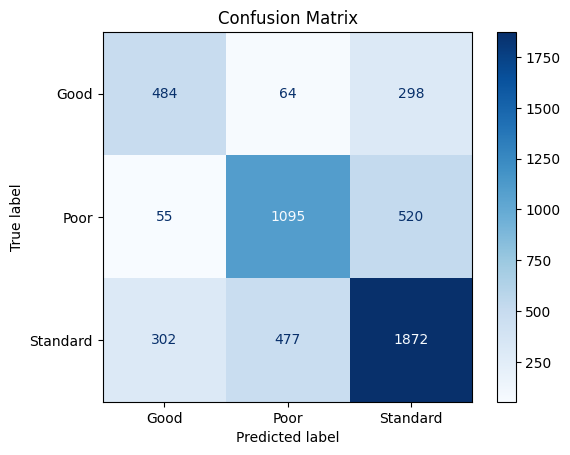

In [19]:
y_pred = clf.predict(X_test)
cm = confusion_matrix(y_test_labels, y_pred, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

In [90]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report


In [91]:
accuracy = accuracy_score(y_test_labels, y_pred)
precision = precision_score(y_test_labels, y_pred, average='weighted')
recall = recall_score(y_test_labels, y_pred, average='weighted')
f1 = f1_score(y_test_labels, y_pred, average='weighted')

print("Evaluation Metrics:")
print(f"Accuracy:  {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"F1 Score:  {f1:.4f}")
print("\nClassification Report:")
print(classification_report(y_test_labels, y_pred))


Evaluation Metrics:
Accuracy:  0.6534
Precision: 0.6487
Recall:    0.6534
F1 Score:  0.6503

Classification Report:
              precision    recall  f1-score   support

        Good       0.51      0.42      0.46       846
        Poor       0.67      0.70      0.68      1670
    Standard       0.68      0.70      0.69      2651

    accuracy                           0.65      5167
   macro avg       0.62      0.61      0.61      5167
weighted avg       0.65      0.65      0.65      5167



###Decision Path for a Single Prediction

In [22]:
from sklearn.tree import export_text
from sklearn.tree import plot_tree


In [23]:
print(export_text(clf, feature_names=list(X.columns)))

|--- Outstanding_Debt <= 1498.05
|   |--- Num_of_Delayed_Payment <= 7.50
|   |   |--- Delay_from_due_date <= 15.50
|   |   |   |--- Num_Credit_Card <= 2.50
|   |   |   |   |--- Changed_Credit_Limit <= 7.64
|   |   |   |   |   |--- Changed_Credit_Limit <= 6.27
|   |   |   |   |   |   |--- Interest_Rate <= 8.50
|   |   |   |   |   |   |   |--- Age <= 19.50
|   |   |   |   |   |   |   |   |--- Total_EMI_per_month <= 23.41
|   |   |   |   |   |   |   |   |   |--- class: Good
|   |   |   |   |   |   |   |   |--- Total_EMI_per_month >  23.41
|   |   |   |   |   |   |   |   |   |--- class: Standard
|   |   |   |   |   |   |   |--- Age >  19.50
|   |   |   |   |   |   |   |   |--- Outstanding_Debt <= 1221.71
|   |   |   |   |   |   |   |   |   |--- Total_EMI_per_month <= 28.07
|   |   |   |   |   |   |   |   |   |   |--- Monthly_Balance <= 205.63
|   |   |   |   |   |   |   |   |   |   |   |--- class: Standard
|   |   |   |   |   |   |   |   |   |   |--- Monthly_Balance >  205.63
|   |   |   |

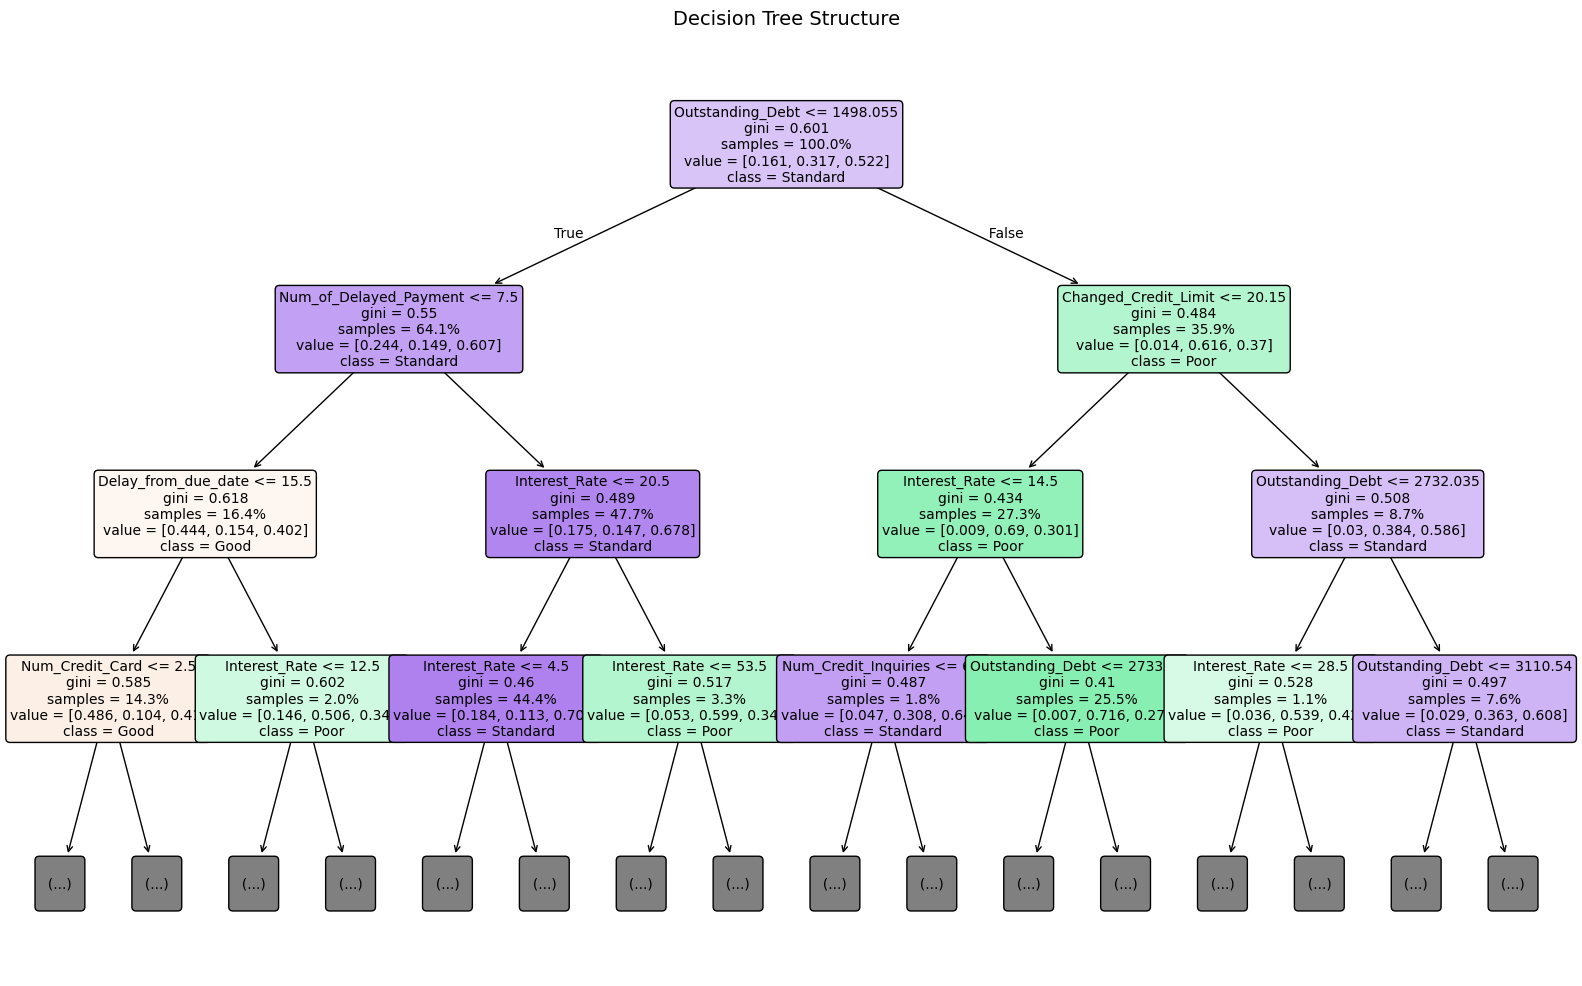

In [24]:
plt.figure(figsize=(20, 12))
plot_tree(
    clf,
    feature_names=X.columns,
    class_names=y_encoded.columns if hasattr(y_encoded, 'columns') else None,
    filled=True,
    rounded=True,
    proportion=True,
    fontsize=10,
    max_depth=3
)
plt.title("Decision Tree Structure", pad=20, fontsize=14)
plt.show()

###Decision Tree Feature Importance

Text(0.5, 1.0, 'Decision Tree Feature Importance')

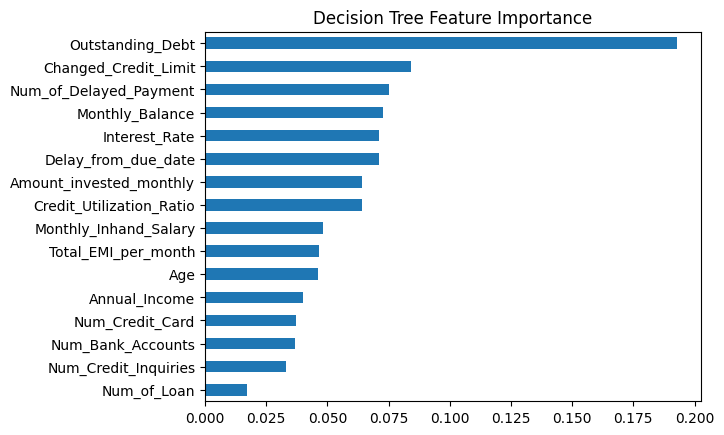

In [ ]:
pd.Series(clf.feature_importances_, index=X.columns).sort_values().plot(kind='barh')
plt.title("Decision Tree Feature Importance")

###SHAP Approach

use TreeExplainer with probabilities

use TreeExplainer with probabilities solving a multi-class classification problem that ensures SHAP explains the class probabilities which are interpretable

In [25]:
explainer = shap.Explainer(clf, X_train, model_output='probability')
shap_values = explainer(X_test)

 93%|=================== | 14458/15501 [00:20<00:01]       

In [26]:
print(type(shap_values))
print(shap_values.shape)
print(shap_values.values.shape)
X_test_df = pd.DataFrame(X_test, columns=X_train.columns)

<class 'shap._explanation.Explanation'>
(5167, 16, 3)
(5167, 16, 3)


Plot SHAP summary

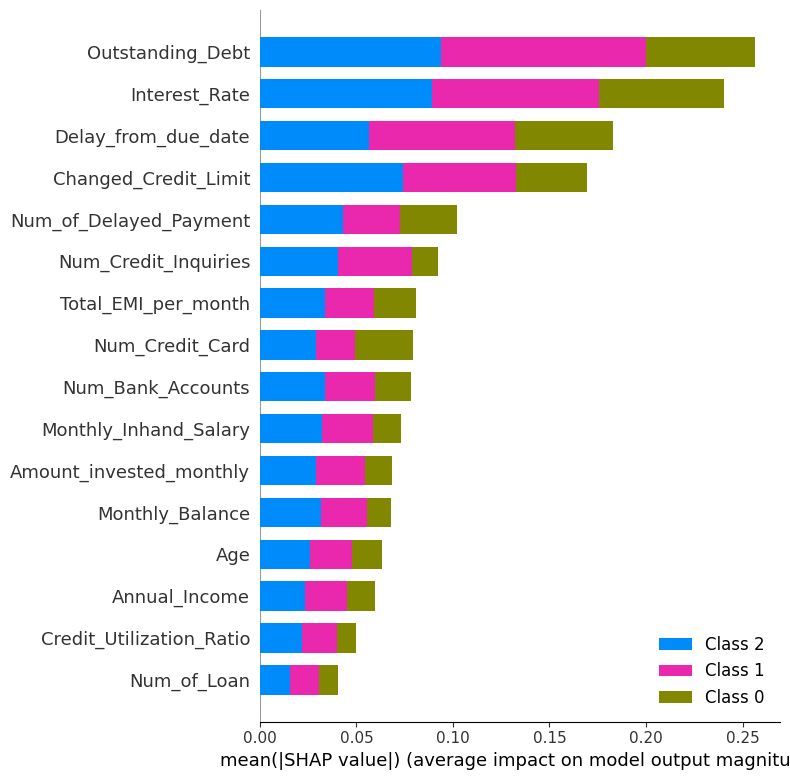

In [ ]:
shap.summary_plot(shap_values, X_test_df)

###Global Surrogate Model

In [27]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import r2_score

Create and fit surrogate model

In [39]:
surrogate = DecisionTreeClassifier(max_depth=3, random_state=42)
clf_preds = clf.predict(X_train)
surrogate.fit(X_train, clf_preds)


DecisionTreeClassifier(max_depth=3, random_state=42)

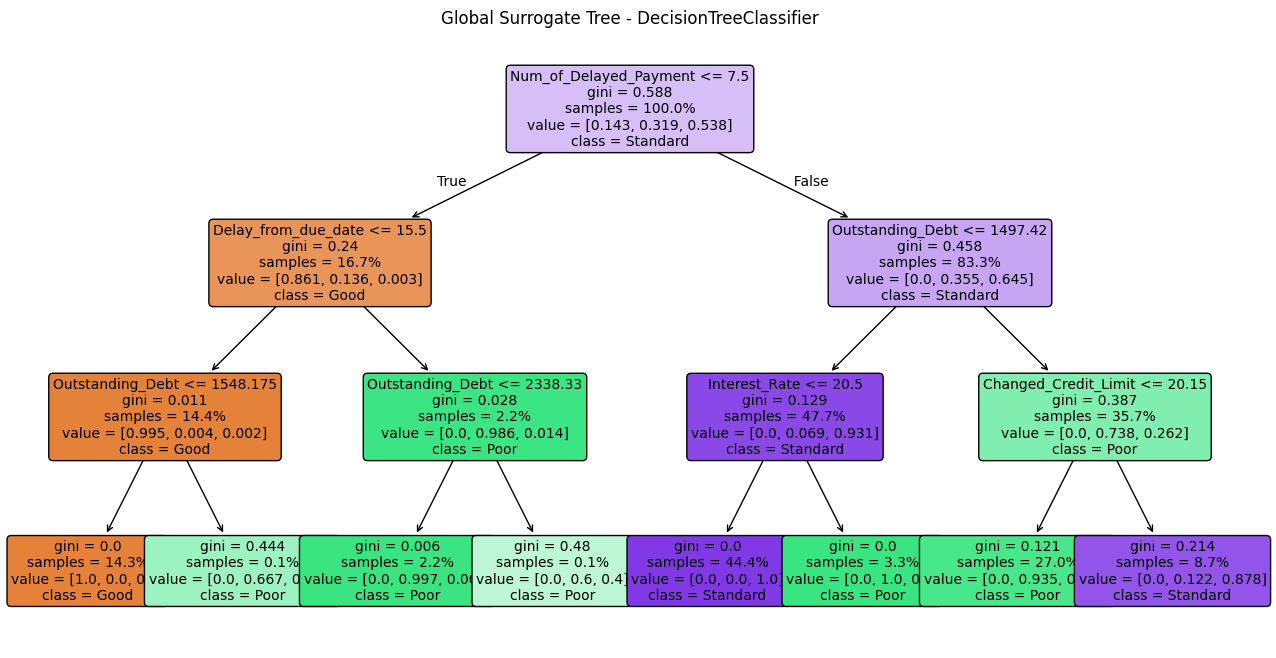

In [40]:
plt.figure(figsize=(16, 8))
plot_tree(surrogate,
          feature_names=X_train.columns,
          class_names=[str(c) for c in surrogate.classes_],
          filled=True,
          rounded=True,
          proportion=True,
          fontsize=10)
plt.title("Global Surrogate Tree - DecisionTreeClassifier")
plt.show()


classification interpretation

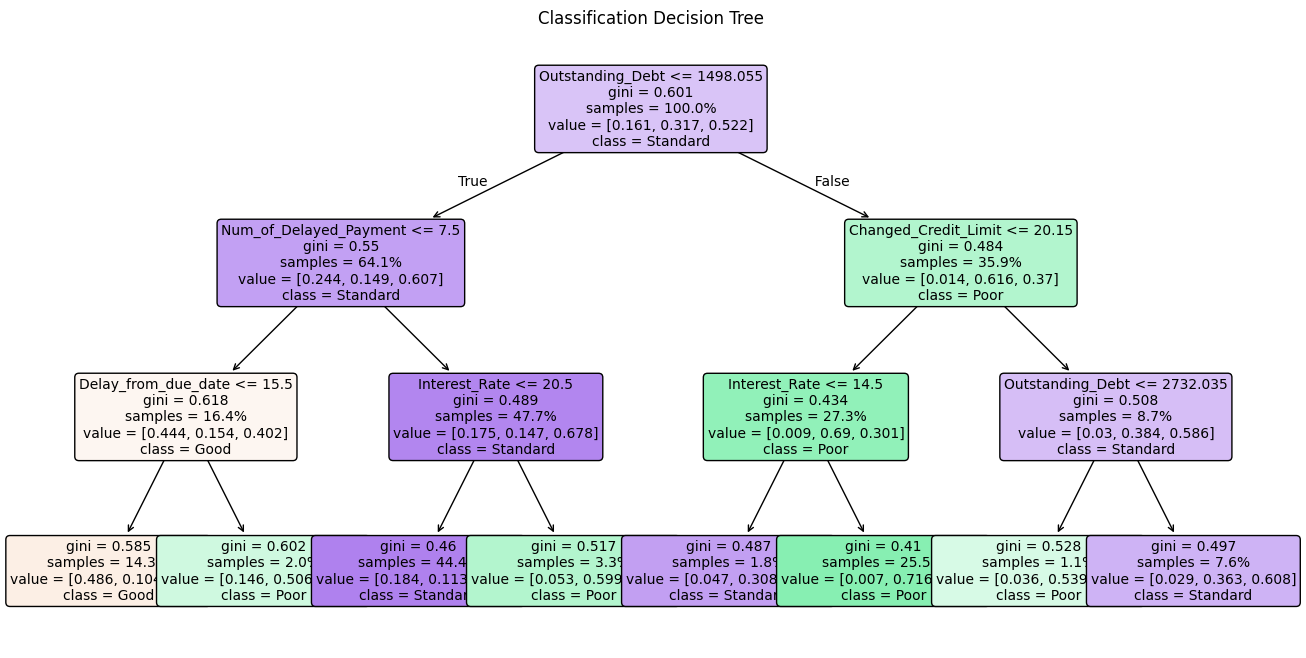

In [42]:
if len(y_train.shape) > 1 and y_train.shape[1] > 1:
    y_train_labels = y_train.idxmax(axis=1)
    y_val_labels = y_val.idxmax(axis=1)
    y_test_labels = y_test.idxmax(axis=1)
else:
    y_train_labels = y_train
    y_val_labels = y_val
    y_test_labels = y_test

clf = DecisionTreeClassifier(random_state=42, max_depth=3)
clf.fit(X_train, y_train_labels)

plt.figure(figsize=(16, 8))
plot_tree(clf,
          feature_names=X_train.columns,
          class_names=[str(c) for c in clf.classes_],
          filled=True,
          rounded=True,
          proportion=True,
          fontsize=10)
plt.title("Classification Decision Tree")
plt.show()


eval

In [43]:
y_pred = clf.predict(X_test)
print("\nClassification Report:")
print(classification_report(y_test_labels, y_pred))


Classification Report:
              precision    recall  f1-score   support

        Good       0.51      0.42      0.46       846
        Poor       0.67      0.70      0.68      1670
    Standard       0.68      0.70      0.69      2651

    accuracy                           0.65      5167
   macro avg       0.62      0.61      0.61      5167
weighted avg       0.65      0.65      0.65      5167



###LIME

In [44]:
!pip install lime shap scikit-learn numpy pandas matplotlib tensorflow pillow


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 4.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=1f950cb563bd7fea5ff00c413cd106652d714cc5a56b4e470ec3ce0a0ea0d661
  Stored in directory: /root/.cache/pip/wheels/85/fa/a3/9c2d44c9f3cd77cf4e533b58900b2bf4487f2a17e8ec212a3d
Successfully built lime


In [46]:
import lime
import lime.lime_tabular
from sklearn.tree import DecisionTreeClassifier
import numpy as np
import pandas as pd


In [45]:
print("y_train shape:", y_train.shape)
print("y_train sample:\n", y_train[:5])

y_train shape: (15501, 3)
y_train sample:
         Good   Poor  Standard
6344   False   True     False
29862   True  False     False
25225  False  False      True
12372  False  False      True
21382  False  False      True


In [47]:
dt = DecisionTreeClassifier(max_depth=3)
dt.fit(X_train.values, y_train)

DecisionTreeClassifier(max_depth=3)

In [51]:
if len(y_train.shape) > 1: #convert to 1D array of class labels
    print("\nConverting multi-format y to class labels...")
    y_train = np.argmax(y_train, axis=1) if y_train.shape[1] > 1 else y_train.flatten()
    print("New y_train shape:", y_train.shape)

Ensure X_train and X_test are properly formatted

In [52]:
if not isinstance(X_train, pd.DataFrame):
    X_train = pd.DataFrame(X_train, columns=[f'feature_{i}' for i in range(X_train.shape[1])])
if not isinstance(X_test, pd.DataFrame):
    X_test = pd.DataFrame(X_test, columns=X_train.columns)

train

In [53]:
dt = DecisionTreeClassifier(max_depth=3)
dt.fit(X_train.values, y_train)

DecisionTreeClassifier(max_depth=3)

In [54]:
test_sample = X_test.iloc[0:1].values
print("\nModel test prediction shape:", dt.predict_proba(test_sample).shape)
print("Model classes:", dt.classes_)



Model test prediction shape: (1, 3)
Model classes: [0 1 2]


  prediction wrapper (for both 2D and 3D output cases)


In [56]:
def predict_proba_wrapper(x):
    probs = dt.predict_proba(x)
    if len(probs.shape) == 3:
        probs = np.mean(probs, axis=0)
    return probs

explainer

In [58]:
explainer = lime.lime_tabular.LimeTabularExplainer(
    training_data=X_train.values,
    feature_names=X_train.columns.tolist(),
    class_names=[str(c) for c in dt.classes_],
    mode='classification',
    random_state=42
)
instance_idx = 5
exp = explainer.explain_instance(
    data_row=X_test.iloc[instance_idx].values,
    predict_fn=predict_proba_wrapper,
    num_features=5
)

exp.show_in_notebook(show_table=True)

#Paper2

 Random Forest Model

Train

In [63]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

Evaluation

In [64]:
y_val_pred = rf.predict(X_val)
print("Validation Accuracy:", accuracy_score(y_val, y_val_pred))
print(classification_report(y_val, y_val_pred))

y_test_pred = rf.predict(X_test)
print("\nTest Accuracy:", accuracy_score(y_test, y_test_pred))

Validation Accuracy: 0.7245984130056126
              precision    recall  f1-score   support

           0       0.78      0.57      0.66       861
           1       0.78      0.75      0.77      1604
           2       0.82      0.75      0.78      2702

   micro avg       0.80      0.72      0.76      5167
   macro avg       0.79      0.69      0.74      5167
weighted avg       0.80      0.72      0.76      5167
 samples avg       0.72      0.72      0.72      5167


Test Accuracy: 0.7315657054383589


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Feature Importance gini-based

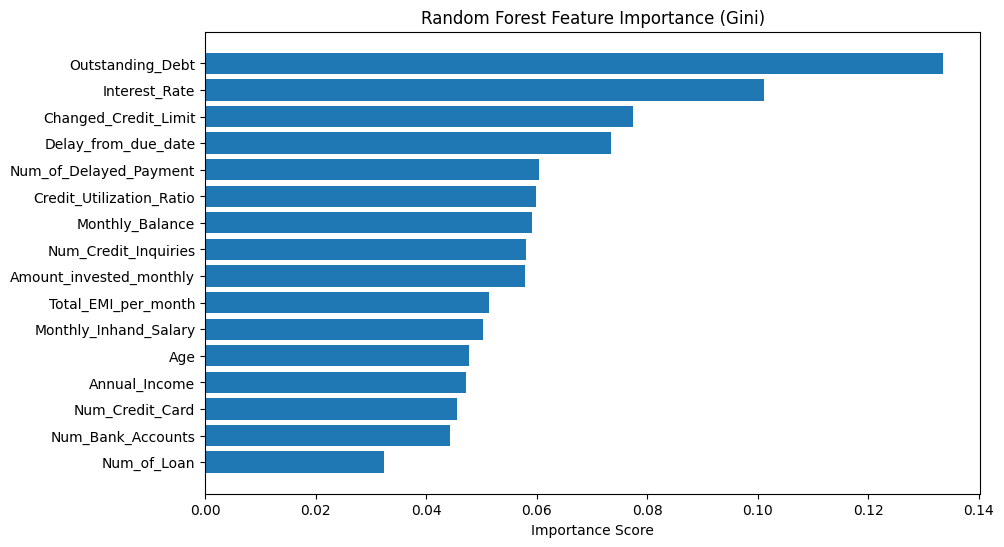

In [ ]:
importances = rf.feature_importances_
feature_names = X_train.columns

importance_df = pd.DataFrame({"Feature": feature_names, "Importance": importances})
importance_df = importance_df.sort_values("Importance", ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(importance_df["Feature"], importance_df["Importance"])
plt.title("Random Forest Feature Importance (Gini)")
plt.xlabel("Importance Score")
plt.gca().invert_yaxis()
plt.show()

Permutation Importance

In [ ]:
result = permutation_importance(
    rf, X_val, y_val, n_repeats=10, random_state=42
)

perm_importance = result.importances_mean
perm_df = pd.DataFrame({"Feature": feature_names, "Importance": perm_importance})
perm_df = perm_df.sort_values("Importance", ascending=False)

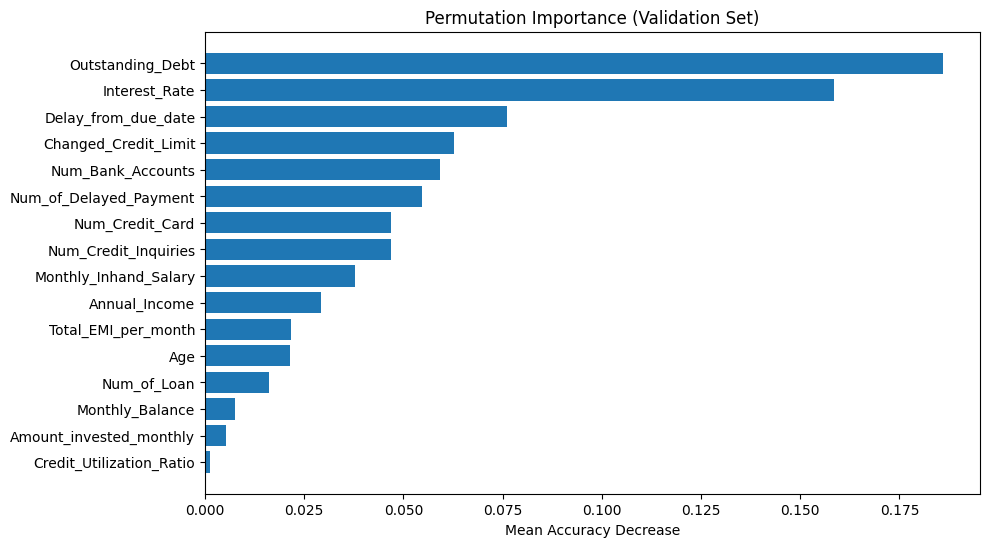

In [ ]:
plt.figure(figsize=(10, 6))
plt.barh(perm_df["Feature"], perm_df["Importance"])
plt.title("Permutation Importance (Validation Set)")
plt.xlabel("Mean Accuracy Decrease")
plt.gca().invert_yaxis()
plt.show()

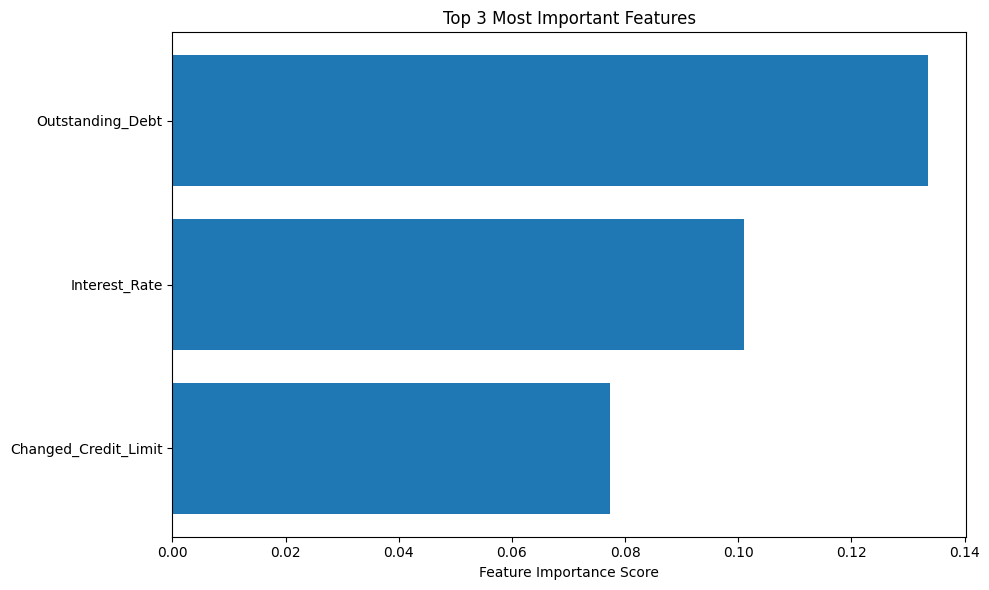

In [ ]:
importances = rf.feature_importances_
sorted_idx = np.argsort(importances)[::-1]
top_features = X_val.columns[sorted_idx[:3]]

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(range(len(top_features)), importances[sorted_idx[:3]][::-1], align='center')
plt.yticks(range(len(top_features)), top_features[::-1])
plt.xlabel("Feature Importance Score")
plt.title("Top 3 Most Important Features")
plt.tight_layout()
plt.show()

In [ ]:
print(rf.classes_)


[array([False,  True]), array([False,  True]), array([False,  True])]


In [ ]:
label_idx = 0
y_train_label = y_train.iloc[:, label_idx]
y_val_label = y_val.iloc[:, label_idx]

rf_single = RandomForestClassifier(n_estimators=100, random_state=42)
rf_single.fit(X_train, y_train_label)

 Plot PDP for top features


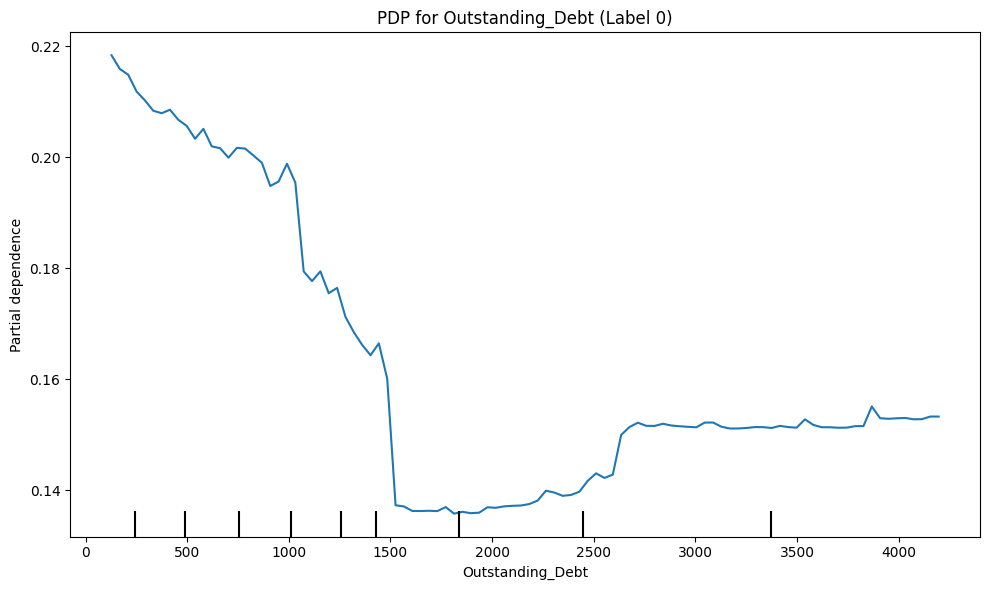

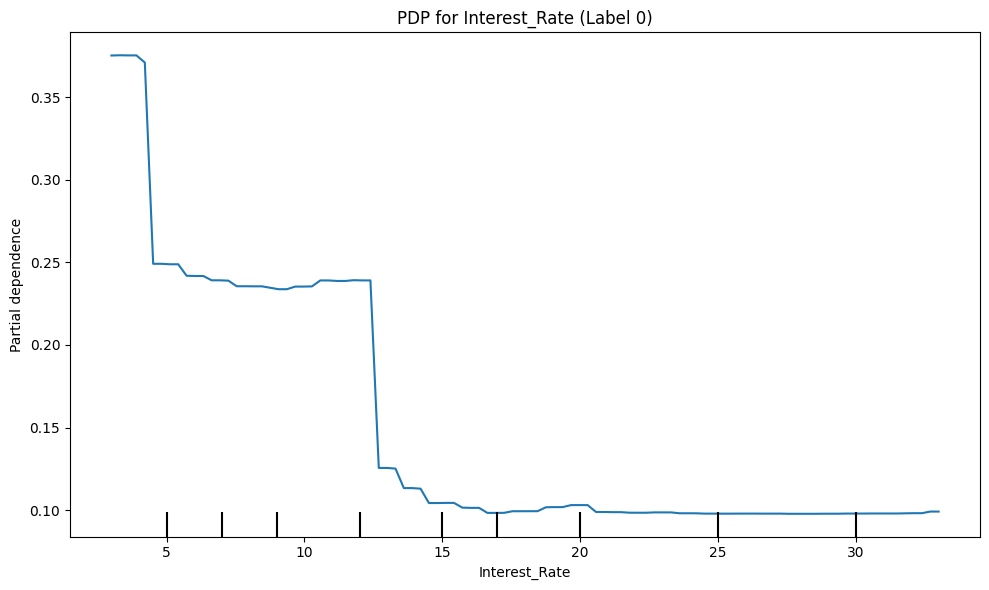

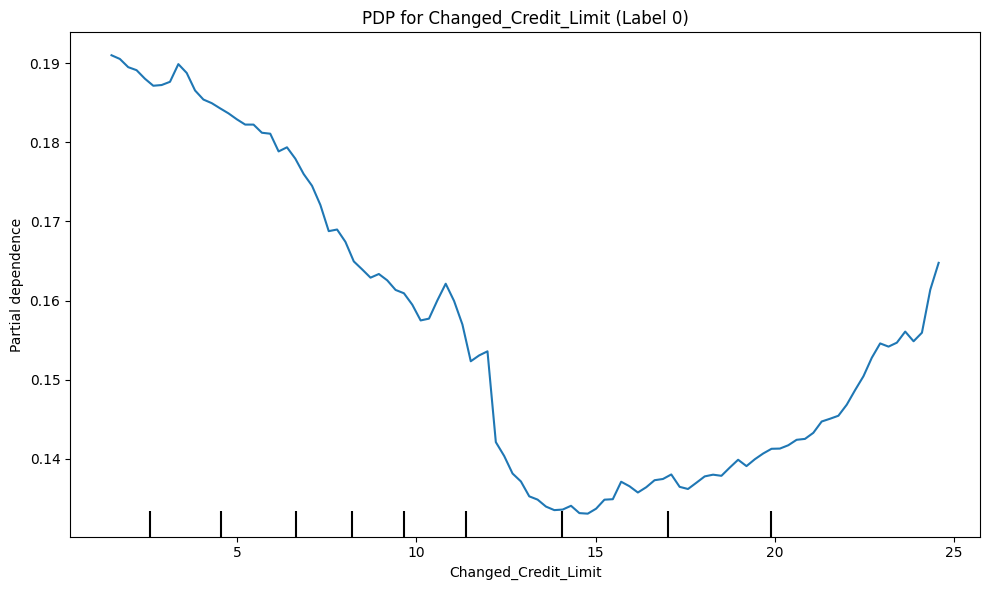

In [ ]:
for feature in top_features:
    try:
        fig, ax = plt.subplots(figsize=(10, 6))
        PartialDependenceDisplay.from_estimator(
            rf_single,
            X_val,
            features=[feature],
            kind='average',  # <- this enables PDP
            ax=ax
        )
        plt.title(f'PDP for {feature} (Label {label_idx})')
        plt.tight_layout()
        plt.show()
    except Exception as e:
        print(f"Couldn't plot PDP for {feature}, label {label_idx}: {str(e)}")


ICE

In [65]:
label_idx = 0
y_train_label = y_train.iloc[:, label_idx]
y_val_label = y_val.iloc[:, label_idx]

rf_single = RandomForestClassifier(n_estimators=100, random_state=42)
rf_single.fit(X_train, y_train_label)

RandomForestClassifier(random_state=42)

Plot ICE for top features

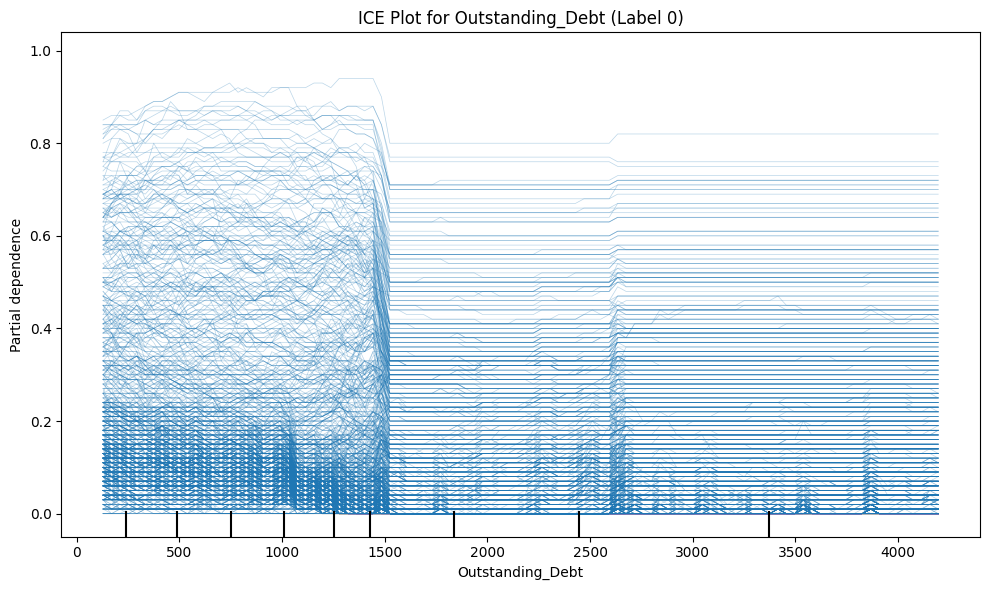

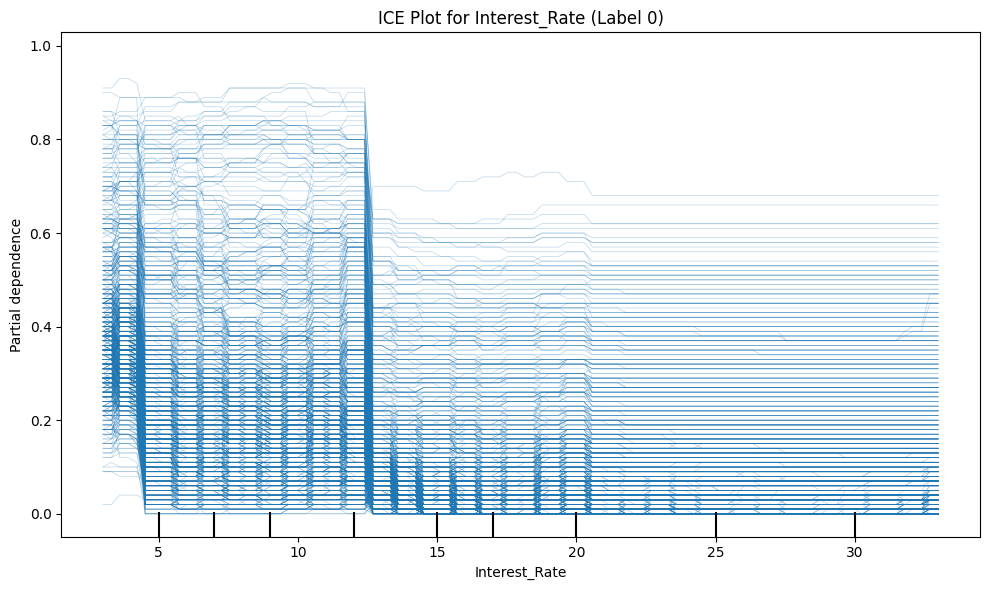

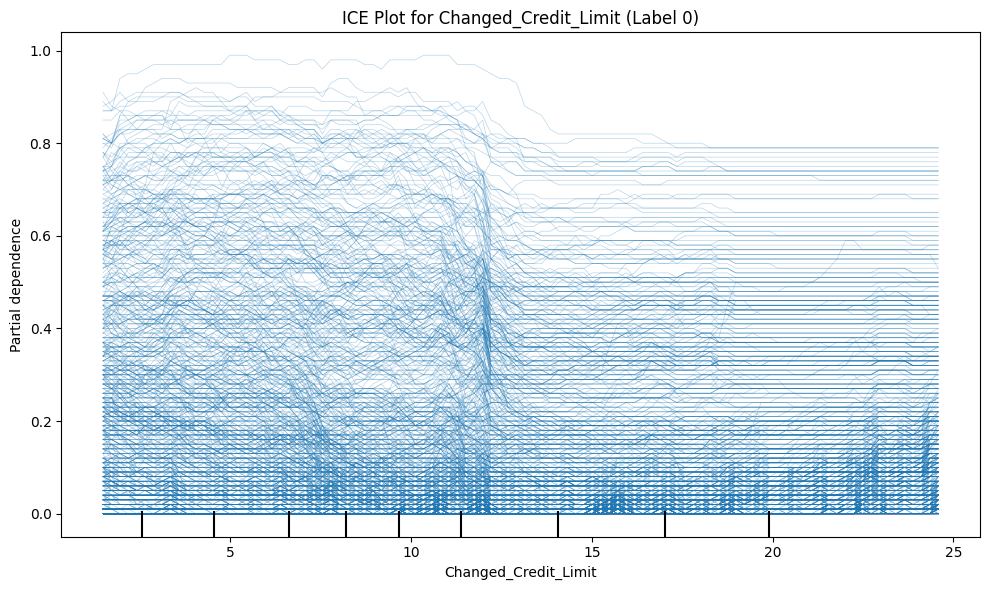

In [ ]:
for feature in top_features:
    try:
        fig, ax = plt.subplots(figsize=(10, 6))
        PartialDependenceDisplay.from_estimator(
            rf_single,
            X_val,
            features=[feature],
            kind='individual',
            ax=ax
        )
        plt.title(f'ICE Plot for {feature} (Label {label_idx})')
        plt.tight_layout()
        plt.show()
    except Exception as e:
        print(f"Couldn't plot ICE for {feature}, label {label_idx}: {str(e)}")


decision paths for RF

In [ ]:
sample_idx = 0
sample = X_val.iloc[[sample_idx]]

tree = rf.estimators_[0]
decision_path = tree.decision_path(sample)

print("Decision path for sample:")
for node_id in decision_path.indices:
    if tree.tree_.children_left[node_id] != tree.tree_.children_right[node_id]:
        feature = X_val.columns[tree.tree_.feature[node_id]]
        threshold = tree.tree_.threshold[node_id]
        value = sample[feature].values[0]
        print(f"Node {node_id}: {feature} <= {threshold:.2f}? (Value: {value:.2f})")

Decision path for sample:
Node 0: Interest_Rate <= 20.50? (Value: 32.00)
Node 3186: Num_of_Loan <= 7.50? (Value: 7.00)
Node 3187: Monthly_Inhand_Salary <= 7227.91? (Value: 2184.58)
Node 3188: Num_Credit_Inquiries <= 5.50? (Value: 14.00)
Node 3234: Interest_Rate <= 53.50? (Value: 32.00)
Node 3235: Monthly_Balance <= 503.90? (Value: 294.96)
Node 3236: Num_of_Loan <= 4.50? (Value: 7.00)
Node 3410: Annual_Income <= 8329.12? (Value: 28230.92)
Node 3436: Num_of_Delayed_Payment <= 13.50? (Value: 19.00)
Node 3516: Outstanding_Debt <= 2513.56? (Value: 2989.13)
Node 3644: Total_EMI_per_month <= 68.83? (Value: 132.48)
Node 3720: Monthly_Inhand_Salary <= 1135.61? (Value: 2184.58)
Node 3726: Delay_from_due_date <= 28.50? (Value: 51.00)
Node 3784: Total_EMI_per_month <= 75.04? (Value: 132.48)
Node 3786: Num_Credit_Inquiries <= 11.50? (Value: 14.00)
Node 3860: Num_Credit_Inquiries <= 497.50? (Value: 14.00)
Node 3861: Changed_Credit_Limit <= 30.38? (Value: 25.17)
Node 3862: Outstanding_Debt <= 4651.23

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning:

X has feature names, but DecisionTreeClassifier was fitted without feature names



In [67]:
sample_idx = 0  #sample
sample = X_val.iloc[[sample_idx]]
tree = rf.estimators_[0]

decision_path = tree.decision_path(sample)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


plot

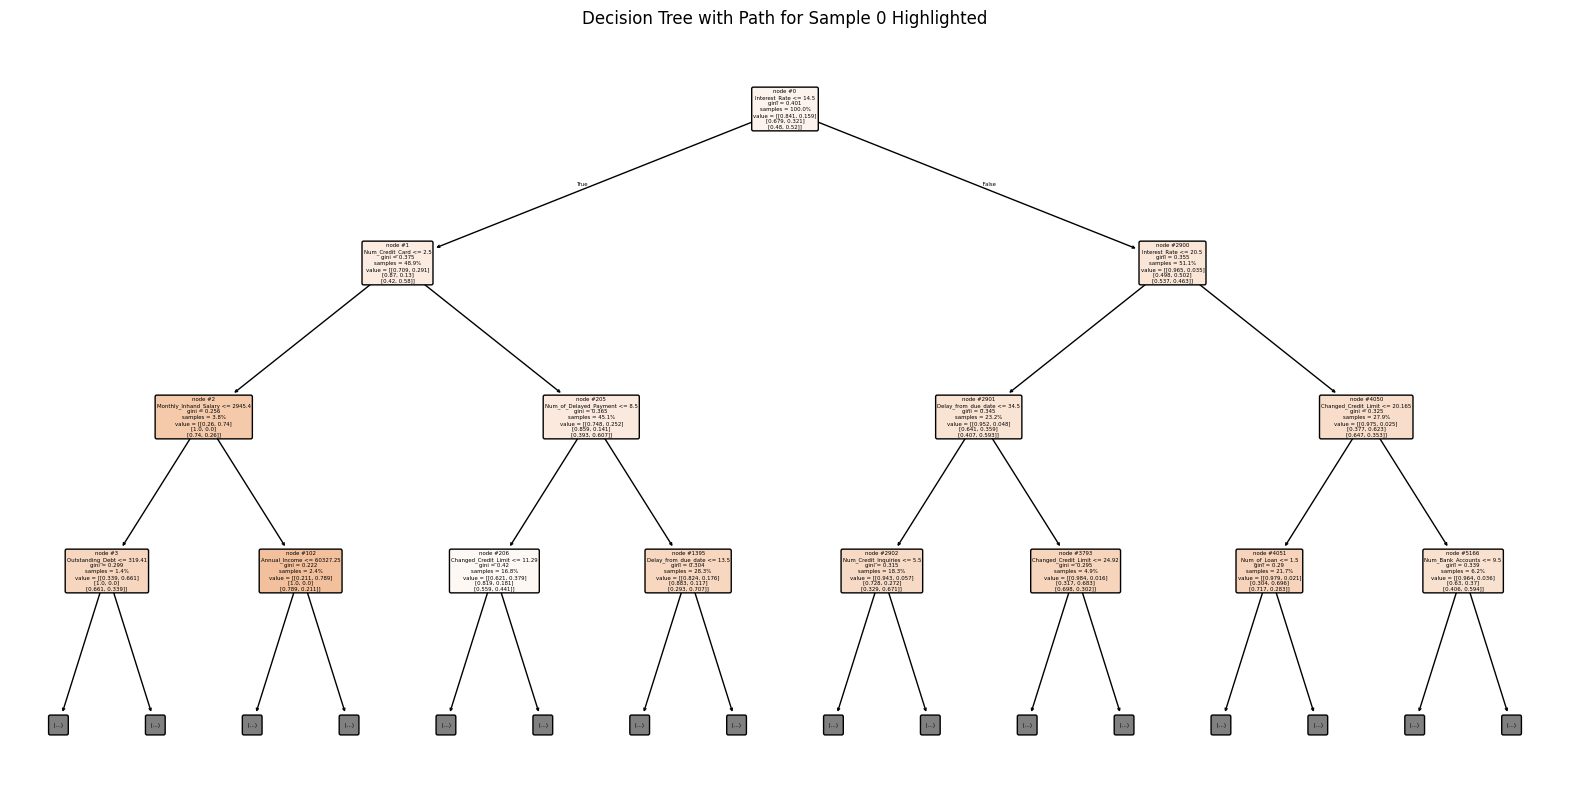

In [70]:
plt.figure(figsize=(20, 10))
plot_tree(tree,
          feature_names=X_val.columns,
          class_names=[str(c) for c in tree.classes_],
          filled=True,
          rounded=True,
          proportion=True,
          node_ids=True,
          max_depth=3)

for node_id in decision_path.indices:
    plt.gca().get_xticks()
    plt.gca().get_yticks()
    plt.scatter([], [], color='red', s=100)

plt.title(f"Decision Tree with Path for Sample {sample_idx} Highlighted")
plt.show()


Detailed Decision Path

In [71]:
print("\nDetailed Decision Path:")
for node_id in decision_path.indices:
    if tree.tree_.children_left[node_id] != tree.tree_.children_right[node_id]:
        feature = X_val.columns[tree.tree_.feature[node_id]]
        threshold = tree.tree_.threshold[node_id]
        value = sample[feature].values[0]
        decision = "YES" if value <= threshold else "NO"
        print(f"Node {node_id}: Is {feature} <= {threshold:.2f}? ({decision}) [Value: {value:.2f}]")

dot_data = export_graphviz(tree,
                          feature_names=X_val.columns,
                          class_names=[str(c) for c in tree.classes_],
                          filled=True,
                          rounded=True,
                          special_characters=True,
                          proportion=True,
                          max_depth=3)

graph = graphviz.Source(dot_data)
graph.render(filename=f'decision_path_sample_{sample_idx}', format='png', cleanup=True)
print("Saved decision path visualization as 'decision_path_sample_0.png'")


Detailed Decision Path:
Node 0: Is Interest_Rate <= 14.50? (NO) [Value: 19.00]
Node 2900: Is Interest_Rate <= 20.50? (YES) [Value: 19.00]
Node 2901: Is Delay_from_due_date <= 34.50? (NO) [Value: 54.00]
Node 3793: Is Changed_Credit_Limit <= 24.92? (YES) [Value: 3.40]
Node 3794: Is Num_of_Loan <= 5.50? (NO) [Value: 7.00]
Node 3858: Is Monthly_Balance <= 86.61? (NO) [Value: 189.63]
Node 3862: Is Total_EMI_per_month <= 183.42? (YES) [Value: 88.00]
Node 3863: Is Outstanding_Debt <= 2089.90? (YES) [Value: 1362.04]
Node 3864: Is Amount_invested_monthly <= 20.45? (NO) [Value: 159.95]
Node 3866: Is Num_of_Delayed_Payment <= 25.50? (YES) [Value: 24.00]
Node 3867: Is Num_Bank_Accounts <= 9.50? (NO) [Value: 10.00]
Node 3869: Is Delay_from_due_date <= 51.50? (NO) [Value: 54.00]
Saved decision path visualization as 'decision_path_sample_0.png'


Shap: this takes much time in RF

In [ ]:
explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(X_val)

shap.summary_plot(shap_values, X_val, feature_names=feature_names)

shap.initjs()
shap.force_plot(explainer.expected_value[0], shap_values[0][0, :], X_val.iloc[0, :])

#Adaboost

In [72]:
y_train_labels = y_train.idxmax(axis=1) # one-hot labels to class labels
y_val_labels = y_val.idxmax(axis=1)
y_test_labels = y_test.idxmax(axis=1)

Define AdaBoost with a shallow tree as base estimator


In [73]:
base_estimator = DecisionTreeClassifier(max_depth=1)
ada_clf = AdaBoostClassifier(
    estimator=base_estimator,
    n_estimators=200,
    learning_rate=0.5,
    random_state=42
)

 Train,

In [74]:
ada_clf.fit(X_train, y_train_labels)

AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1),
                   learning_rate=0.5, n_estimators=200, random_state=42)

Predict and Evaluate on Validation Set

In [ ]:
y_val_pred = ada_clf.predict(X_val)
val_acc = accuracy_score(y_val_labels, y_val_pred)
print(f"Validation Accuracy: {val_acc}")
print("Validation Classification Report:")
print(classification_report(y_val_labels, y_val_pred))


Validation Accuracy: 0.6209218021750389
Validation Classification Report:
              precision    recall  f1-score   support

        Good       0.67      0.22      0.33       651
        Poor       0.66      0.59      0.62      1252
    Standard       0.60      0.78      0.68      1959

    accuracy                           0.62      3862
   macro avg       0.64      0.53      0.54      3862
weighted avg       0.63      0.62      0.60      3862

Test Accuracy: 0.6258415328845158
Test Classification Report:
              precision    recall  f1-score   support

        Good       0.72      0.18      0.29       631
        Poor       0.63      0.59      0.61      1196
    Standard       0.62      0.78      0.69      2035

    accuracy                           0.63      3862
   macro avg       0.66      0.52      0.53      3862
weighted avg       0.64      0.63      0.60      3862



Predict and Evaluate on Test Set

In [75]:
y_test_pred = ada_clf.predict(X_test)
test_acc = accuracy_score(y_test_labels, y_test_pred)
print(f"Test Accuracy: {test_acc}")
print("Test Classification Report:")
print(classification_report(y_test_labels, y_test_pred))

Test Accuracy: 0.6266692471453454
Test Classification Report:
              precision    recall  f1-score   support

        Good       0.76      0.18      0.29       846
        Poor       0.63      0.68      0.65      1670
    Standard       0.62      0.74      0.67      2651

    accuracy                           0.63      5167
   macro avg       0.67      0.53      0.54      5167
weighted avg       0.64      0.63      0.60      5167



feature importances

In [76]:
feature_importances = ada_clf.feature_importances_
feature_names = [
    'Monthly_Balance',
    'Amount_invested_monthly',
    'Total_EMI_per_month',
    'Credit_Utilization_Ratio',
    'Outstanding_Debt',
    'Num_Credit_Inquiries',
    'Changed_Credit_Limit',
    'Num_of_Delayed_Payment',
    'Delay_from_due_date',
    'Num_of_Loan',
    'Interest_Rate',
    'Num_Credit_Card',
    'Num_Bank_Accounts',
    'Monthly_Inhand_Salary',
    'Annual_Income',
    'Age'
]


In [77]:
sorted_idx = np.argsort(feature_importances)
sorted_features = [feature_names[i] for i in sorted_idx]
sorted_importances = feature_importances[sorted_idx]

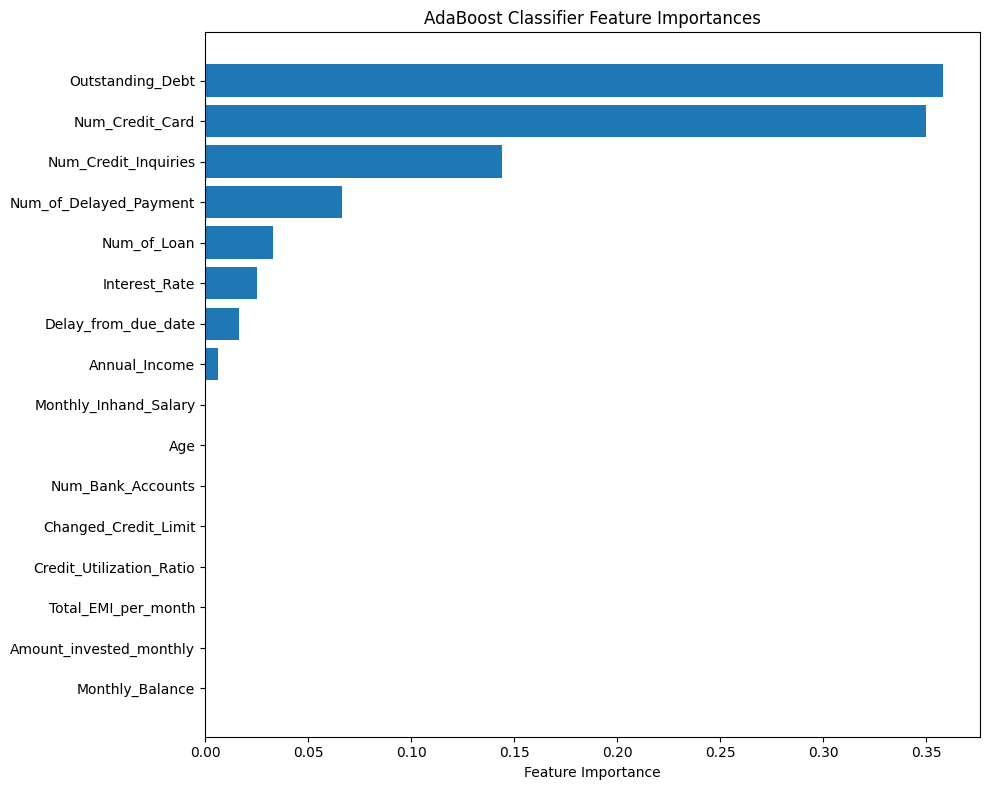

In [78]:
plt.figure(figsize=(10, 8))
plt.barh(sorted_features, sorted_importances)
plt.xlabel('Feature Importance')
plt.title('AdaBoost Classifier Feature Importances')
plt.tight_layout()
plt.show()

permutation importance

<ipython-input-80-edd4d6121042>:7: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(


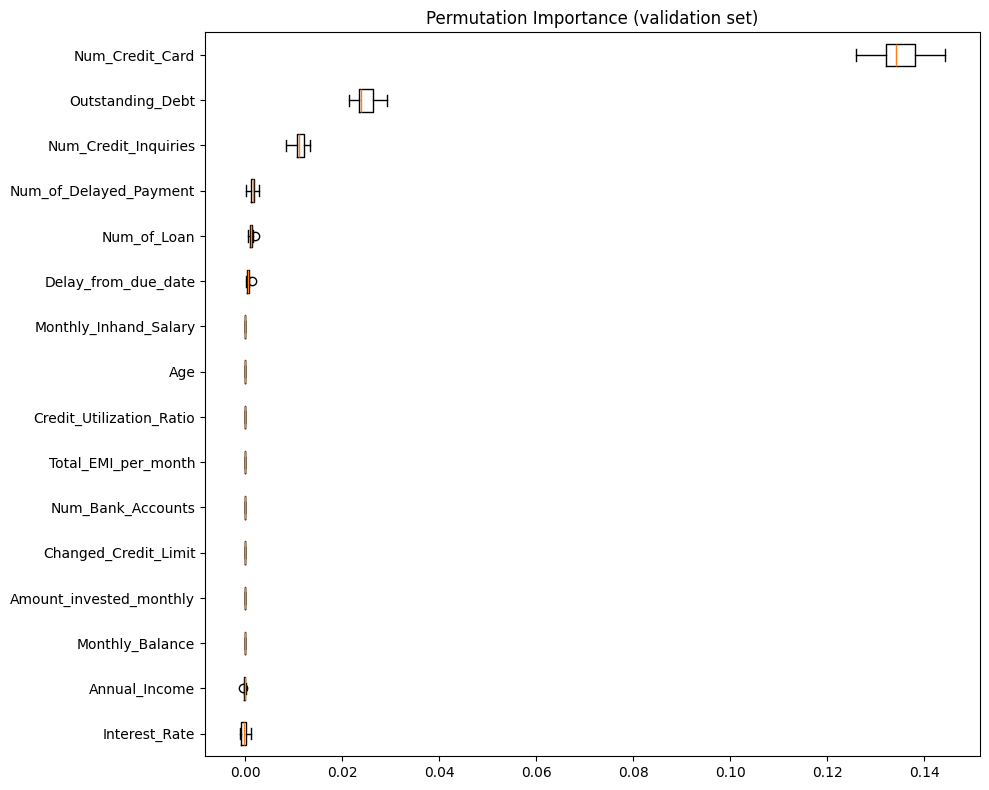

In [80]:
result = permutation_importance(
    ada_clf, X_val, y_val_labels, n_repeats=10, random_state=42
)
sorted_idx = result.importances_mean.argsort()

plt.figure(figsize=(10, 8))
plt.boxplot(
    result.importances[sorted_idx].T,
    vert=False, labels=np.array(feature_names)[sorted_idx]
)
plt.title("Permutation Importance (validation set)")
plt.tight_layout()
plt.show()

 LIME explainer

In [81]:
import lime
import lime.lime_tabular

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(


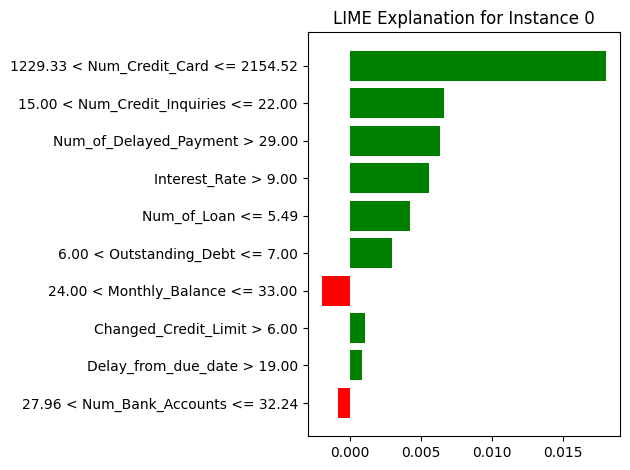

In [82]:
explainer = lime.lime_tabular.LimeTabularExplainer(
    X_train.values,
    feature_names=feature_names,
    class_names=ada_clf.classes_,
    mode='classification',
    discretize_continuous=True
)

# specific instance
idx_to_explain = 0
exp = explainer.explain_instance(
    X_val.iloc[idx_to_explain].values,
    ada_clf.predict_proba,
    num_features=10
)

fig = exp.as_pyplot_figure()
plt.title(f'LIME Explanation for Instance {idx_to_explain}')
plt.tight_layout()
plt.show()

surrogate model

In [84]:
from sklearn.linear_model import LogisticRegression

In [83]:
surrogate = LogisticRegression(max_iter=1000)
surrogate.fit(X_train, ada_clf.predict(X_train))

LogisticRegression(max_iter=1000)

 Comparision coefficients with AdaBoost feature importances


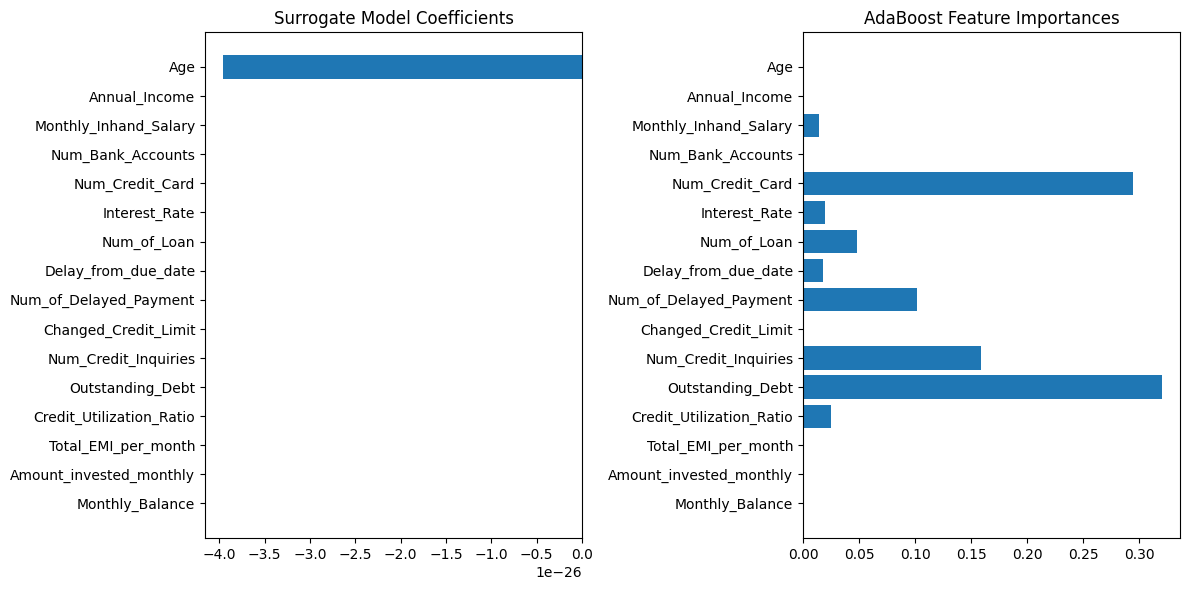

In [ ]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.barh(feature_names, surrogate.coef_[0])
plt.title('Surrogate Model Coefficients')
plt.subplot(1, 2, 2)
plt.barh(feature_names, feature_importances)
plt.title('AdaBoost Feature Importances')
plt.tight_layout()
plt.show()

lofo importance

In [87]:
from sklearn.model_selection import cross_val_score
from tqdm import tqdm

In [88]:
def lofo_importance(model, X, y, features, cv=5, scoring='accuracy'):
    base_score = np.mean(cross_val_score(
        model, X, y, cv=cv, scoring=scoring
    ))

    importance_scores = []

    for feature in tqdm(features, desc='Calculating LOFO Importance'):
        X_reduced = X.drop(feature, axis=1)
        reduced_score = np.mean(cross_val_score(
            model, X_reduced, y, cv=cv, scoring=scoring
        ))
        importance_scores.append(base_score - reduced_score)
    results = pd.DataFrame({
        'feature': features,
        'importance': importance_scores,
        'remaining_score': base_score - np.array(importance_scores)
    }).sort_values('importance', ascending=False)

    return results

lofo_results = lofo_importance(
    ada_clf,
    X_train,
    y_train_labels,
    feature_names
)

print("LOFO Importance Results:")
print(lofo_results)

Calculating LOFO Importance: 100%|██████████| 16/16 [12:52<00:00, 48.25s/it]

LOFO Importance Results:
                     feature    importance  remaining_score
4           Outstanding_Debt  4.515463e-03         0.627766
10             Interest_Rate  2.128991e-03         0.630153
8        Delay_from_due_date  1.871134e-03         0.630411
1    Amount_invested_monthly  1.161207e-03         0.631121
7     Num_of_Delayed_Payment  6.452029e-04         0.631637
6       Changed_Credit_Limit  5.163163e-04         0.631765
5       Num_Credit_Inquiries  2.579813e-04         0.632024
0            Monthly_Balance  0.000000e+00         0.632282
15                       Age  0.000000e+00         0.632282
3   Credit_Utilization_Ratio  0.000000e+00         0.632282
9                Num_of_Loan  0.000000e+00         0.632282
13     Monthly_Inhand_Salary  0.000000e+00         0.632282
14             Annual_Income  0.000000e+00         0.632282
2        Total_EMI_per_month -4.160989e-08         0.632282
12         Num_Bank_Accounts -1.225765e-03         0.633508
11           Nu

invert_yaxis to show most important at top

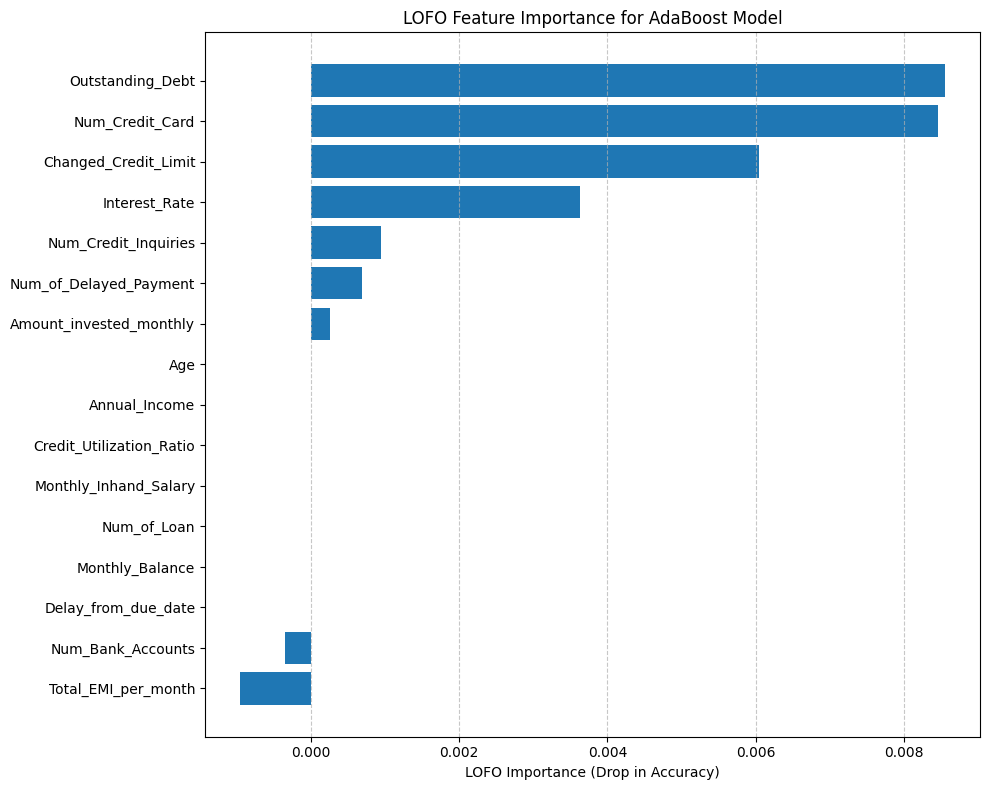

In [ ]:
plt.figure(figsize=(10, 8))
plt.barh(lofo_results['feature'], lofo_results['importance'])
plt.xlabel('LOFO Importance (Drop in Accuracy)')
plt.title('LOFO Feature Importance for AdaBoost Model')
plt.gca().invert_yaxis()
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [ ]:
print(X_val.dtypes[top_features])


Outstanding_Debt        float64
Interest_Rate             int64
Changed_Credit_Limit    float64
dtype: object


In [ ]:
print(X_train.dtypes)
X_train_encoded = pd.get_dummies(X_train)
X_val_encoded = pd.get_dummies(X_val)
X_test_encoded = pd.get_dummies(X_test)

Age                           int64
Annual_Income               float64
Monthly_Inhand_Salary       float64
Num_Bank_Accounts           float64
Num_Credit_Card             float64
Interest_Rate               float64
Num_of_Loan                   int64
Delay_from_due_date         float64
Num_of_Delayed_Payment        int64
Changed_Credit_Limit        float64
Num_Credit_Inquiries        float64
Outstanding_Debt            float64
Credit_Utilization_Ratio    float64
Total_EMI_per_month         float64
Amount_invested_monthly     float64
Monthly_Balance             float64
dtype: object


evaluation

In [ ]:
X_train_enc = X_train_enc.astype(np.float64)
X_val_enc = X_val_enc.astype(np.float64)
X_test_enc = X_test_enc.astype(np.float64)

Validation Accuracy: 0.6209218021750389
Validation Classification Report:
              precision    recall  f1-score   support

        Good       0.67      0.22      0.33       651
        Poor       0.66      0.59      0.62      1252
    Standard       0.60      0.78      0.68      1959

    accuracy                           0.62      3862
   macro avg       0.64      0.53      0.54      3862
weighted avg       0.63      0.62      0.60      3862

Test Accuracy: 0.6258415328845158
Test Classification Report:
              precision    recall  f1-score   support

        Good       0.72      0.18      0.29       631
        Poor       0.63      0.59      0.61      1196
    Standard       0.62      0.78      0.69      2035

    accuracy                           0.63      3862
   macro avg       0.66      0.52      0.53      3862
weighted avg       0.64      0.63      0.60      3862

Model class labels: ['Good' 'Poor' 'Standard']
Error creating PDP: '<' not supported between instances

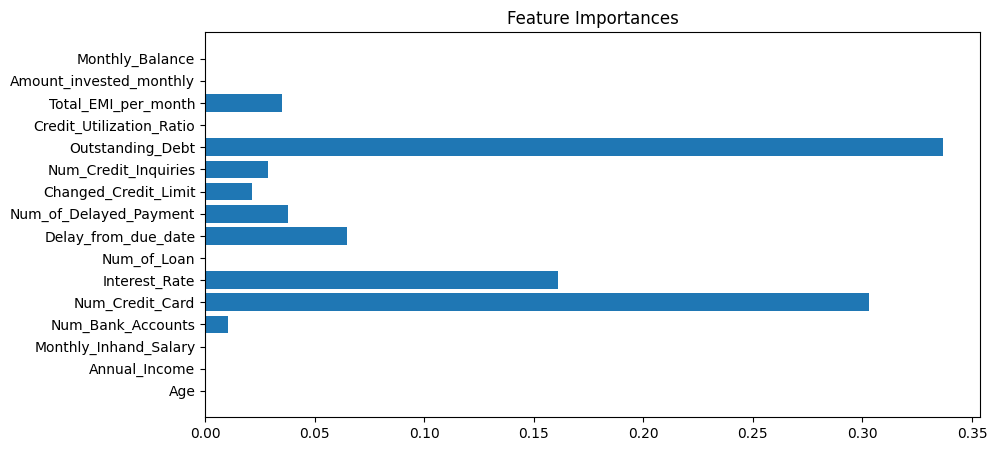

In [ ]:
print("Validation Accuracy:", accuracy_score(y_val_labels, ada_clf.predict(X_val_enc)))
print("Validation Classification Report:")
print(classification_report(y_val_labels, ada_clf.predict(X_val_enc)))

print("Test Accuracy:", accuracy_score(y_test_labels, ada_clf.predict(X_test_enc)))
print("Test Classification Report:")
print(classification_report(y_test_labels, ada_clf.predict(X_test_enc)))

The AdaBoost model significantly outperforms the baseline model, achieving higher accuracy (72% vs. 63%) and much better balance across classes, especially for the "Good" credit score, where recall improved from 19% to 54%. This indicates that AdaBoost is better at identifying all credit score categories and provides a more reliable classification overall.

#Paper 3

In [ ]:
y_train_1d = np.argmax(y_train, axis=1)
print("y_train shape:", y_train_1d.shape)


y_train shape: (34620,)


 Multi-Class Logistic Regression

In [ ]:
y_train_1d = np.argmax(y_train, axis=1) if y_train.ndim > 1 else y_train
y_val_1d = np.argmax(y_val, axis=1) if y_val.ndim > 1 else y_val
y_test_1d = np.argmax(y_test, axis=1) if y_test.ndim > 1 else y_test

Train the LR

In [ ]:
logreg = LogisticRegression(max_iter=1000, random_state=42)
logreg.fit(X_train, y_train_1d)

LogisticRegression(max_iter=1000, random_state=42)

Prediction and evaluation

In [ ]:
y_val_pred = logreg.predict(X_val)
print("Validation Accuracy:", accuracy_score(y_val_1d, y_val_pred))
print("\nClassification Report:\n", classification_report(y_val_1d, y_val_pred))

Validation Accuracy: 0.5246100519930675

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00      1892
           1       0.00      0.00      0.00      3594
           2       0.52      1.00      0.69      6054

    accuracy                           0.52     11540
   macro avg       0.17      0.33      0.23     11540
weighted avg       0.28      0.52      0.36     11540



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



Coefficient Analysis (One-vs-Rest)


Class 0 - Top Features:
                    Feature   Coefficient  Class
15          Monthly_Balance -1.386294e-27      0
1             Annual_Income -2.544712e-44      0
2     Monthly_Inhand_Salary -3.829139e-46      0
11         Outstanding_Debt -2.902709e-46      0
13      Total_EMI_per_month -1.843105e-46      0
14  Amount_invested_monthly -8.055711e-47      0
0                       Age -1.579800e-47      0
5             Interest_Rate -1.076296e-47      0
8    Num_of_Delayed_Payment -4.720393e-48      0
7       Delay_from_due_date -4.350938e-48      0

Class 1 - Top Features:
                     Feature   Coefficient  Class
15           Monthly_Balance -1.386294e-27      1
1              Annual_Income -4.196433e-45      1
2      Monthly_Inhand_Salary -2.579355e-46      1
11          Outstanding_Debt  1.275871e-46      1
13       Total_EMI_per_month -2.876023e-47      1
14   Amount_invested_monthly -1.314359e-47      1
0                        Age -3.445531e-48      1
7        De

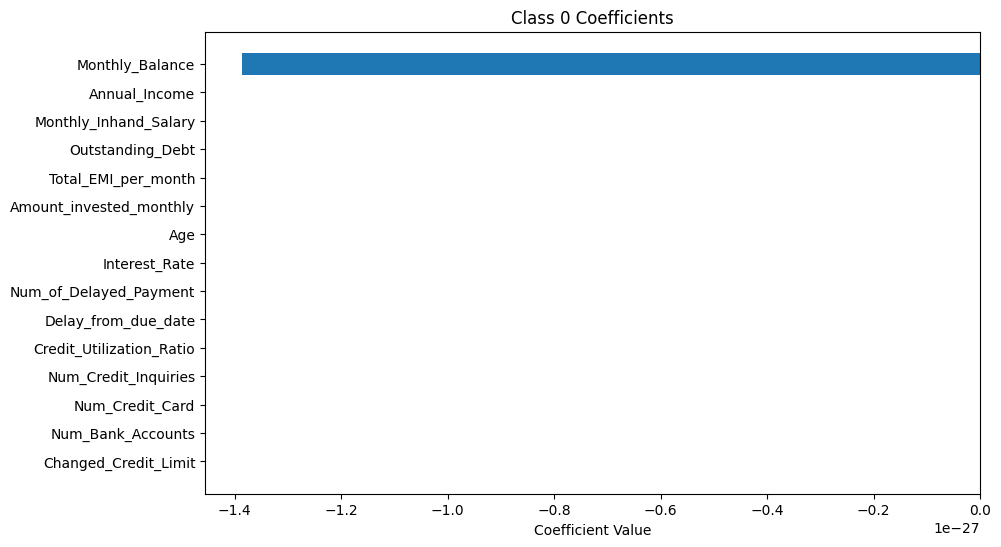

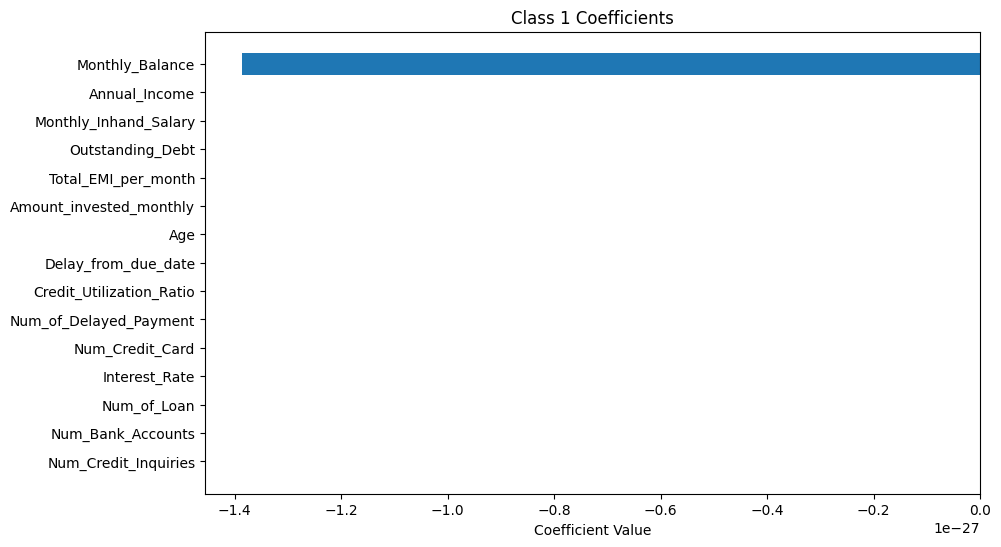

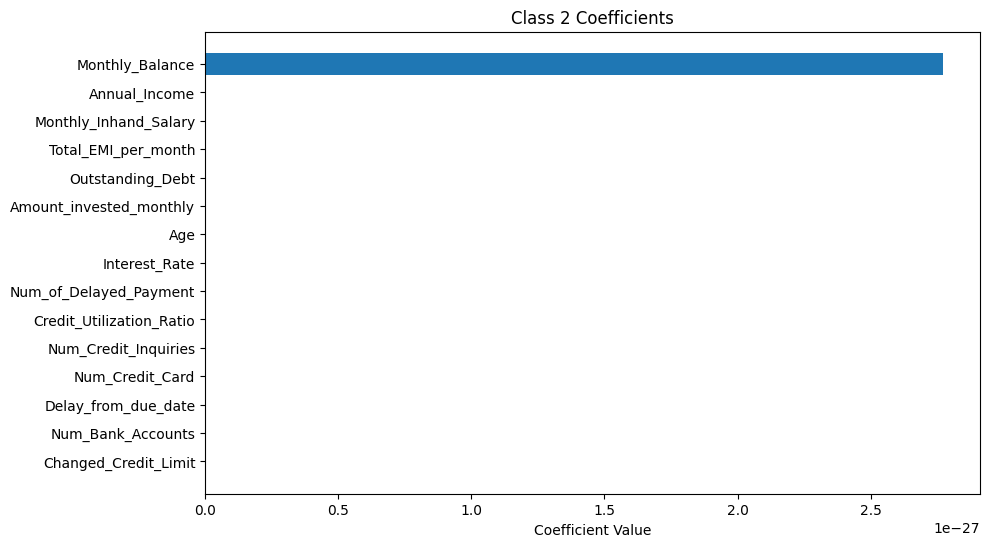

In [ ]:
coef_dfs = []
for i, class_name in enumerate(logreg.classes_):
    coef_df = pd.DataFrame({
        "Feature": X_train.columns,
        "Coefficient": logreg.coef_[i],
        "Class": class_name
    }).sort_values("Coefficient", key=abs, ascending=False)
    coef_dfs.append(coef_df)

    print(f"\nClass {class_name} - Top Features:")
    print(coef_df.head(10))

for i, class_name in enumerate(logreg.classes_):
    plt.figure(figsize=(10, 6))
    plt.barh(coef_dfs[i]["Feature"].head(15),
             coef_dfs[i]["Coefficient"].head(15))
    plt.title(f"Class {class_name} Coefficients")
    plt.xlabel("Coefficient Value")
    plt.gca().invert_yaxis()
    plt.show()


coefficients (weights) for each feature and class

Feature Coefficients per Class:
            Age  Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  \
0 -1.579800e-47  -2.544712e-44          -3.829139e-46      -2.613605e-48   
1 -3.445531e-48  -4.196433e-45          -2.579355e-46       1.401834e-49   
2  1.924354e-47   2.964356e-44           6.408494e-46       2.473422e-48   

   Num_Credit_Card  Interest_Rate   Num_of_Loan  Delay_from_due_date  \
0    -3.060138e-48  -1.076296e-47 -1.606901e-48        -4.350938e-48   
1     2.757873e-49  -2.493192e-49 -1.457796e-49         1.670914e-48   
2     2.784351e-48   1.101227e-47  1.752681e-48         2.680024e-48   

   Num_of_Delayed_Payment  Changed_Credit_Limit  Num_Credit_Inquiries  \
0           -4.720393e-48         -1.889320e-48         -4.109962e-48   
1           -2.761798e-49         -6.769316e-50          7.791612e-50   
2            4.996573e-48          1.957013e-48          4.032046e-48   

   Outstanding_Debt  Credit_Utilization_Ratio  Total_EMI_per_month  \
0     -2.90

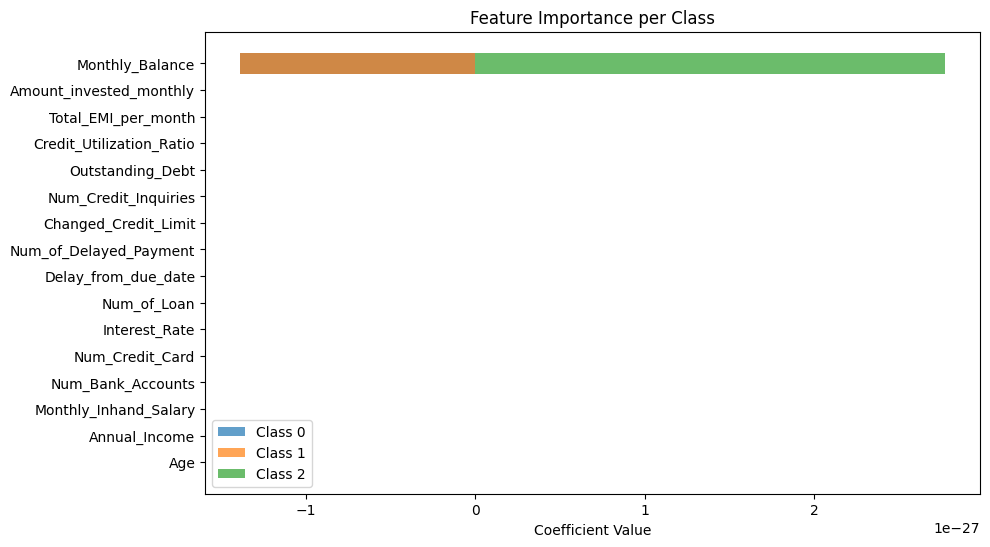

In [ ]:
coef_df = pd.DataFrame(
    logreg.coef_,
    columns=X_train.columns,
    index=logreg.classes_
)

print("Feature Coefficients per Class:")
print(coef_df)

plt.figure(figsize=(10, 6))
for i, class_name in enumerate(logreg.classes_):
    plt.barh(X_train.columns, logreg.coef_[i], alpha=0.7, label=f'Class {class_name}')
plt.legend()
plt.xlabel("Coefficient Value")
plt.title("Feature Importance per Class")
plt.show()

Confusion Matrix (Validation Set) for LR

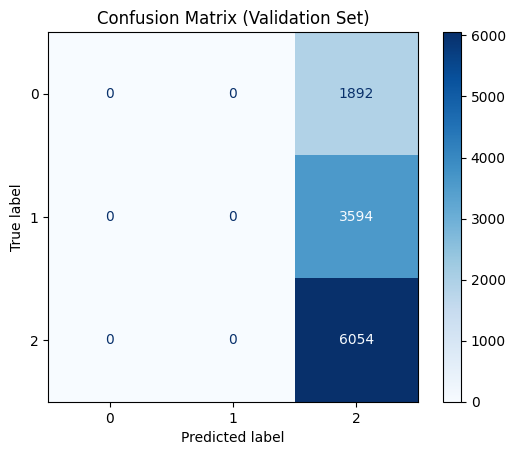

In [ ]:
y_val_pred = logreg.predict(X_val)
cm = confusion_matrix(y_val_1d, y_val_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=logreg.classes_)
disp.plot(cmap="Blues")
plt.title("Confusion Matrix (Validation Set)")
plt.show()

PDP

/usr/local/lib/python3.11/dist-packages/sklearn/inspection/_plot/partial_dependence.py:976: UserWarning:

Attempting to set identical low and high ylims makes transformation singular; automatically expanding.



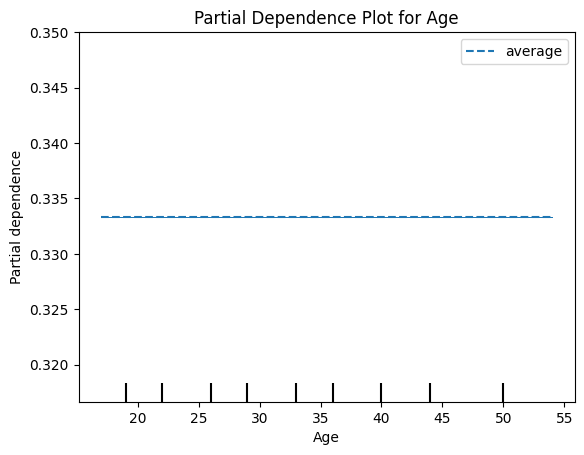

In [ ]:
feature_name = X_train.columns[0]
PartialDependenceDisplay.from_estimator(
    logreg,
    X_val,
    features=[feature_name],
    target=0,
    kind="both"
)
plt.title(f"Partial Dependence Plot for {feature_name}")
plt.show()

GLM model For Multinomial Logistic Regression

In [ ]:
import statsmodels.api as sm

X_train_sm = sm.add_constant(X_train)
X_val_sm = sm.add_constant(X_val)

glm_model = sm.MNLogit(y_train_1d, X_train_sm)
glm_results = glm_model.fit()

print(glm_results.summary())

/usr/local/lib/python3.11/dist-packages/statsmodels/discrete/discrete_model.py:3027: RuntimeWarning:

overflow encountered in exp

/usr/local/lib/python3.11/dist-packages/statsmodels/discrete/discrete_model.py:3028: RuntimeWarning:

invalid value encountered in divide



Optimization terminated successfully.
         Current function value: nan
         Iterations 2
                          MNLogit Regression Results                          
Dep. Variable:                      y   No. Observations:                34620
Model:                        MNLogit   Df Residuals:                    34586
Method:                           MLE   Df Model:                           32
Date:                Sat, 03 May 2025   Pseudo R-squ.:                     nan
Time:                        14:12:25   Log-Likelihood:                    nan
converged:                       True   LL-Null:                       -34440.
Covariance Type:            nonrobust   LLR p-value:                       nan
                     y=1       coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                           nan        nan        nan        nan         nan     

SHAP Approach


SHAP Summary for Class 0:


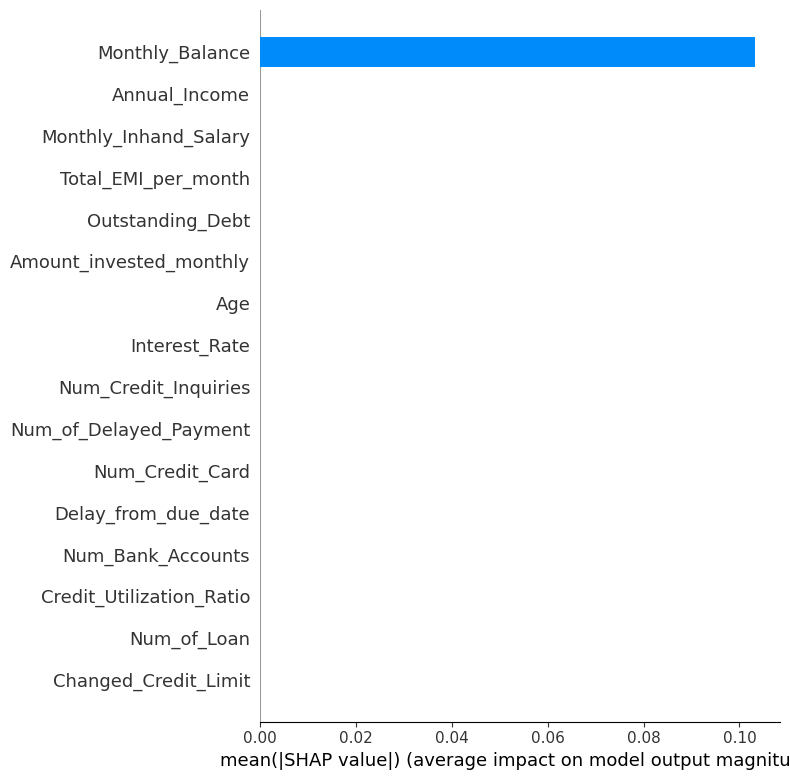


SHAP Summary for Class 1:


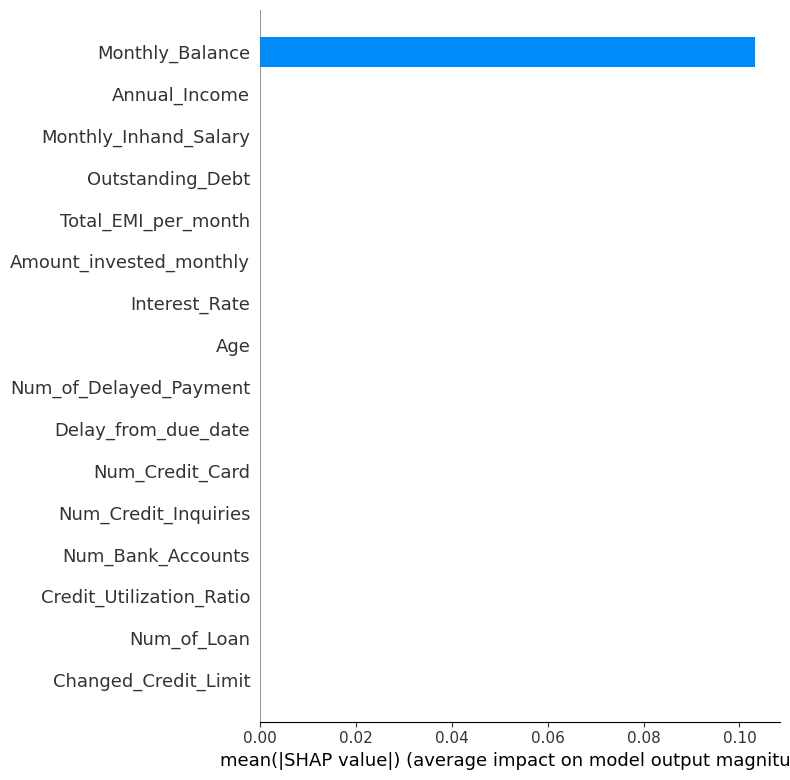


SHAP Summary for Class 2:


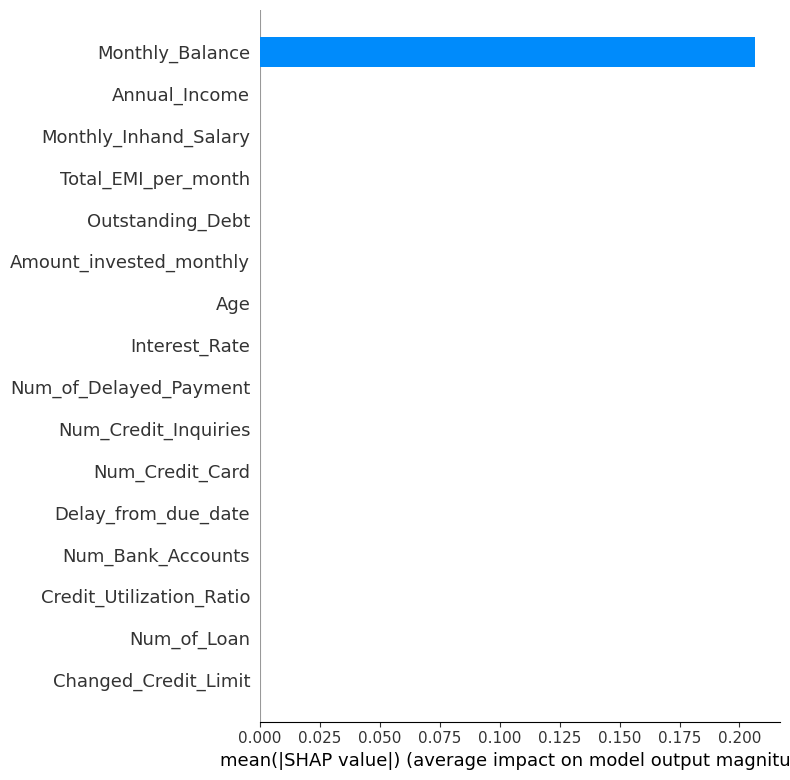

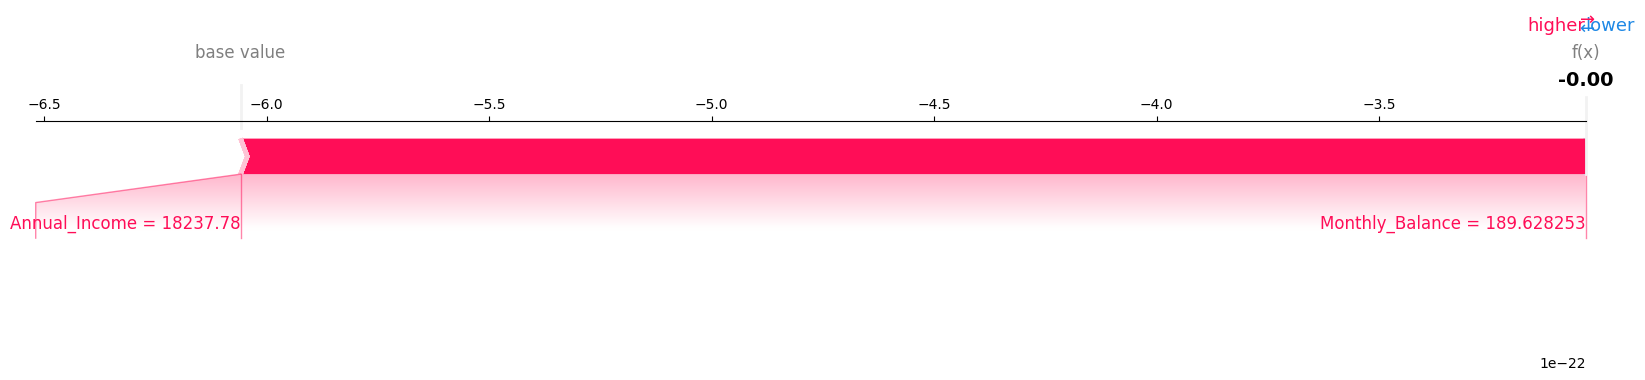

In [ ]:
explainer = shap.Explainer(logreg, X_train)
shap_values = explainer(X_val)

for i, class_name in enumerate(logreg.classes_):
    print(f"\nSHAP Summary for Class {class_name}:")
    shap.summary_plot(shap_values[:,:,i], X_val, plot_type="bar")

sample_idx = 0
class_idx = 0
shap.plots.force(shap_values[sample_idx,:,class_idx], matplotlib=True)

 Partial Dependence Plots (Per Class)


Partial Dependence Plots for Class 0:


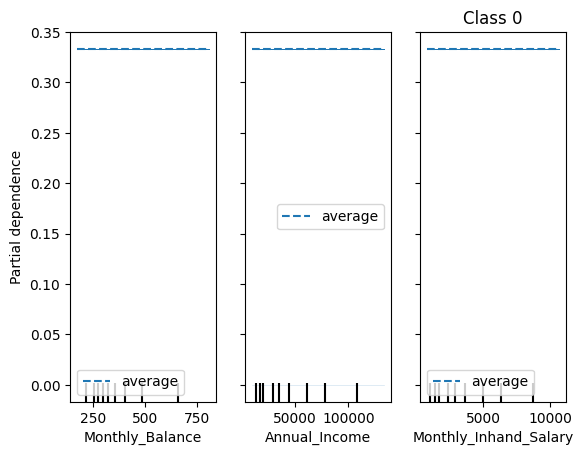


Partial Dependence Plots for Class 1:


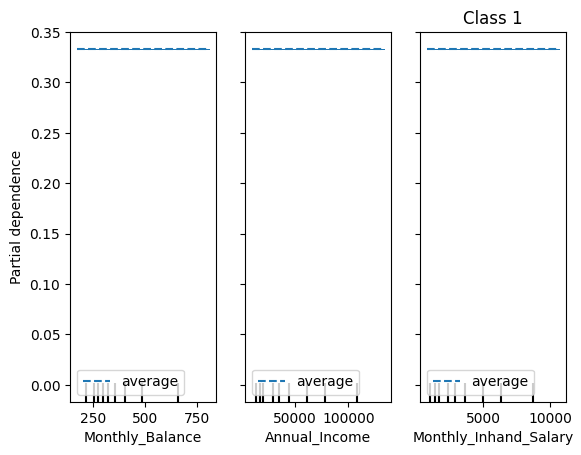


Partial Dependence Plots for Class 2:


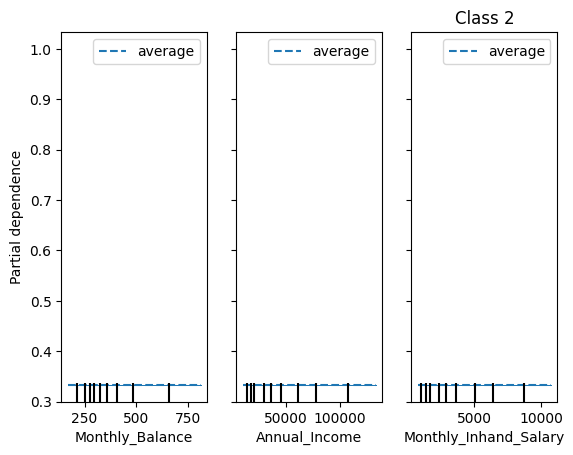

In [ ]:
top_features = coef_dfs[0]["Feature"].head(3).tolist()

for i, class_name in enumerate(logreg.classes_):
    print(f"\nPartial Dependence Plots for Class {class_name}:")
    PartialDependenceDisplay.from_estimator(
        logreg,
        X_train,
        features=top_features,
        target=i,
        kind="both",
        ice_lines_kw={"alpha": 0.2}
    )
    plt.title(f"Class {class_name}")
    plt.show()